In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union


 要求されたパッケージ SeuratObject をロード中です 

 要求されたパッケージ sp をロード中です 


 次のパッケージを付け加えます: ‘SeuratObject’ 


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, t




In [2]:
.libPaths("~/R_4.1.3_library")

In [3]:
GSE149622_RNA.data <- Read10X(data.dir = "/home/harita/work/scRNA-seq/data/GSE149622_RNAver3/", gene.column = 1)

In [4]:
# Initialize the Seurat object with the raw (non-normalized data).
GSE149622_RNA <- CreateSeuratObject(counts = GSE149622_RNA.data, project = "GSE149622_RNA3k", min.cells = 3, min.features = 200)
GSE149622_RNA

An object of class Seurat 
16842 features across 26877 samples within 1 assay 
Active assay: RNA (16842 features, 0 variable features)
 1 layer present: counts

In [8]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
GSE149622_RNA[["percent.mt"]] <- PercentageFeatureSet(GSE149622_RNA, pattern = "^MT-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of percent.mt.”


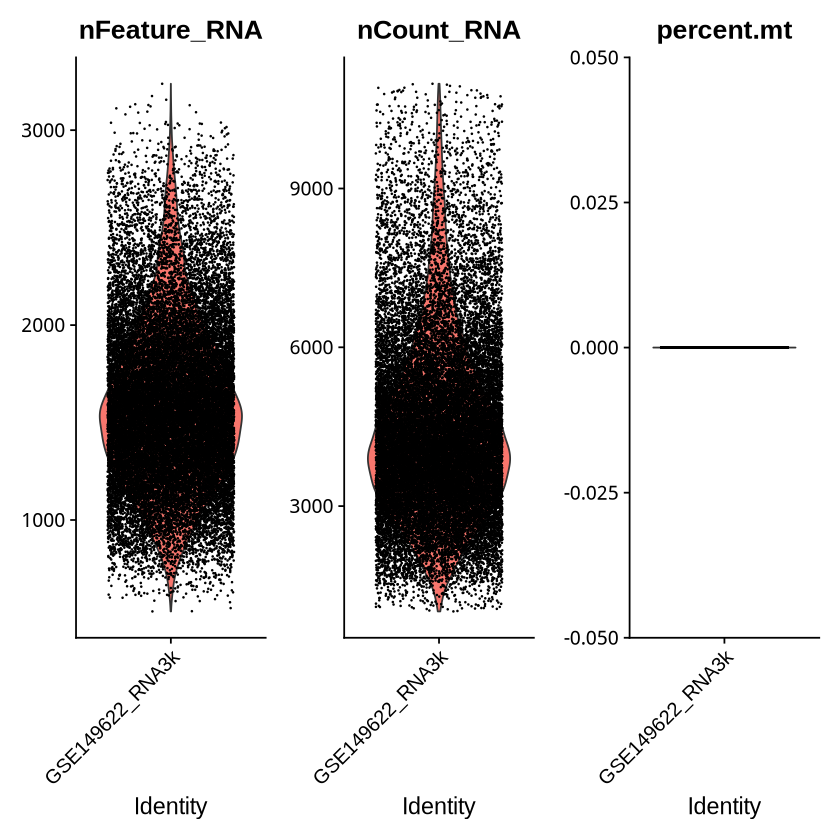

In [9]:
# Visualize QC metrics as a violin plot
VlnPlot(GSE149622_RNA, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [10]:
# ミトコンドリア遺伝子名を探す（通常は "MT-" で始まる）
GSE149622_RNA[["percent.mt"]] <- PercentageFeatureSet(GSE149622_RNA, pattern = "^MT-")

In [11]:
head(GSE149622_RNA[["percent.mt"]])

percent.mt
Timept0.AAACCCAAGCTATCTG 0         
Timept0.AAACCCAAGGTAATCA 0         
Timept0.AAACCCAAGTCTAACC 0         
Timept0.AAACCCAAGTCTCTGA 0         
Timept0.AAACCCACACACCTGG 0         
Timept0.AAACCCACAGCACCCA 0

In [12]:
grep("^MT-", rownames(GSE149622_RNA), value = TRUE)

character(0)

In [13]:
head(rownames(GSE149622_RNA))  # 遺伝子名の一部を確認

[1] "Yfp"     "Gfp"     "Bfp"     "Mrpl15"  "Lypla1"  "Gm37988"

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


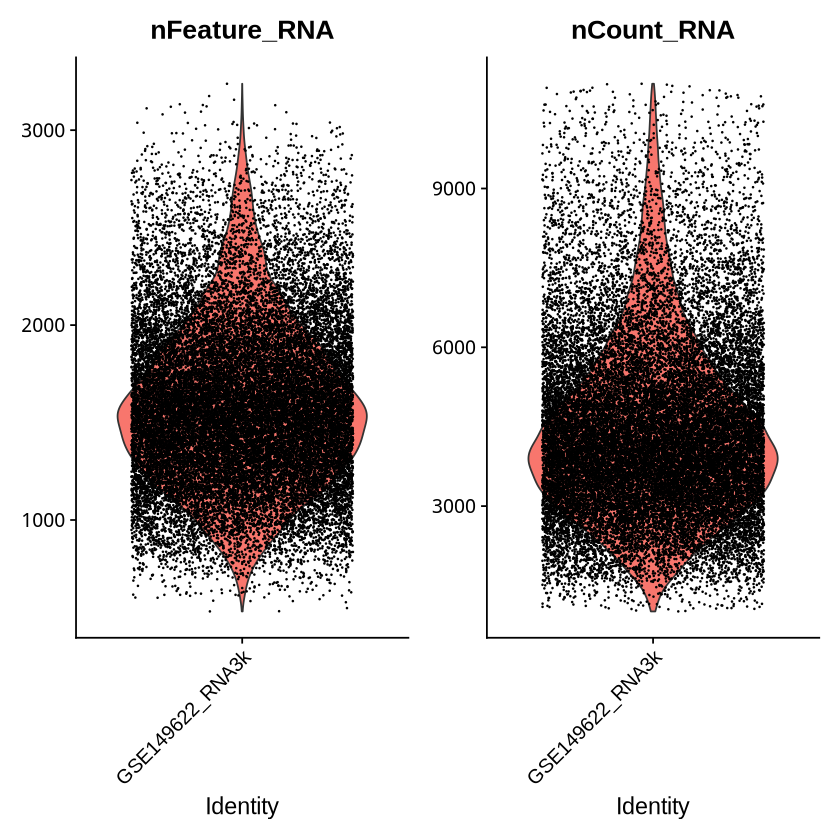

In [15]:
VlnPlot(GSE149622_RNA, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

Warning message in cor(x = data[, 1], y = data[, 2]):
“ 標準偏差が 0 です ”


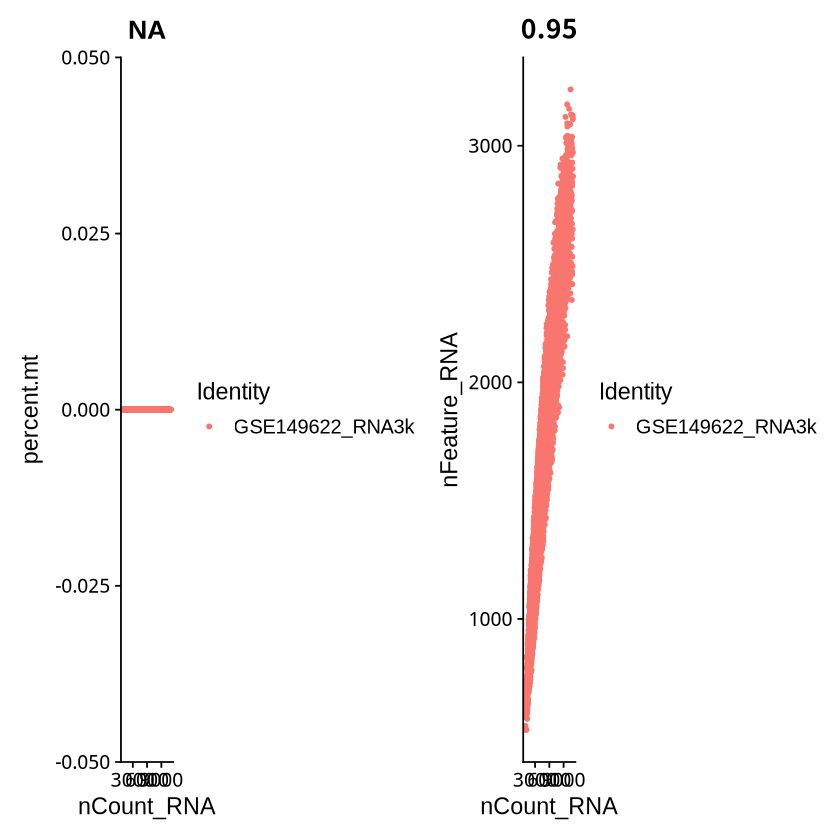

In [16]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(GSE149622_RNA, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(GSE149622_RNA, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

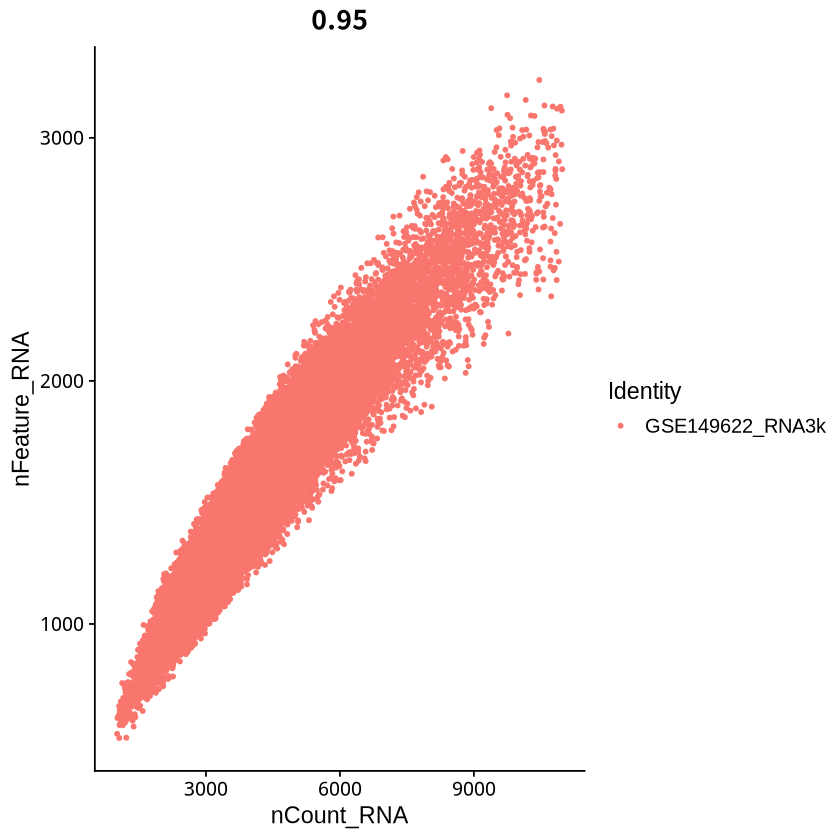

In [17]:
plot1 <- FeatureScatter(GSE149622_RNA, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1

In [18]:
GSE149622_RNA <- subset(GSE149622_RNA, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

In [19]:
GSE149622_RNA <- NormalizeData(GSE149622_RNA, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



In [20]:
GSE149622_RNA <- NormalizeData(GSE149622_RNA)

Normalizing layer: counts



Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results



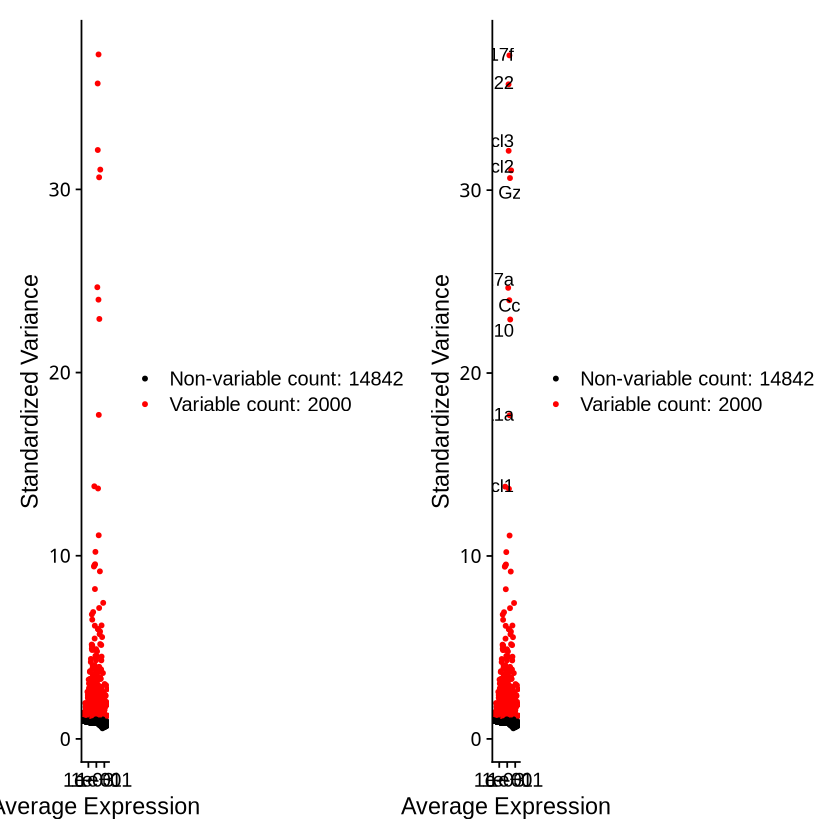

In [4]:
GSE149622_RNA <- FindVariableFeatures(GSE149622_RNA, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(GSE149622_RNA), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(GSE149622_RNA)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

When using repel, set xnudge and ynudge to 0 for optimal results



ERROR: Error in ggsave("~/work/scRNA-seq/workvariable_feature_plot.png", plot = plot1 + :  関数 "ggsave" を見つけることができませんでした 


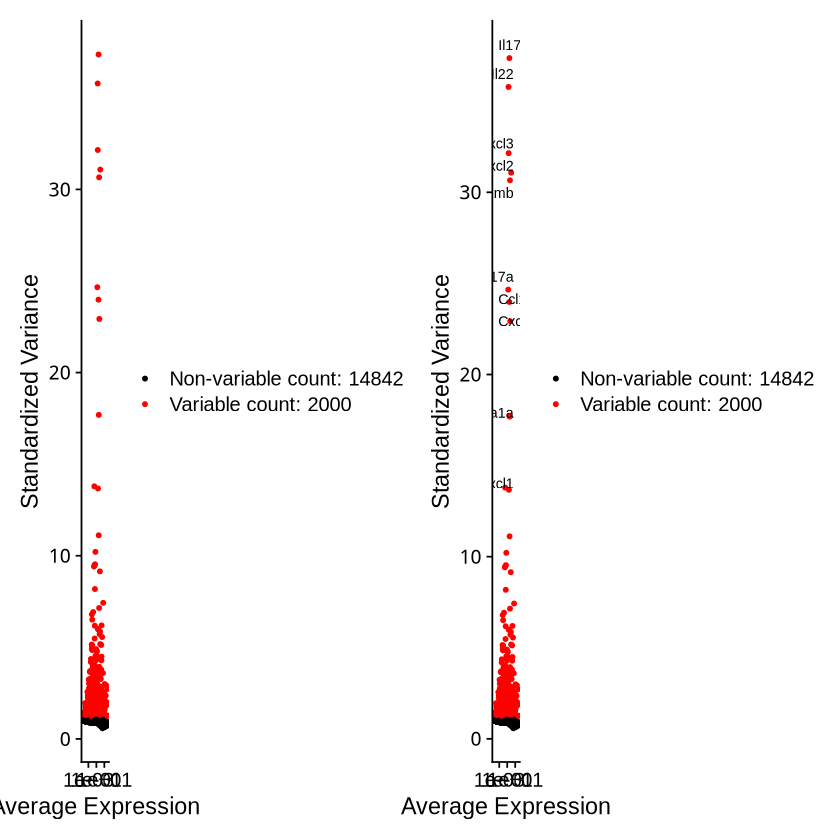

In [7]:
# xnudge と ynudge の微調整
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE, xnudge = 0.2, ynudge = 0.2, size = 3)

# 両方のプロットを表示
plot1 + plot2
# サイズを指定して保存
ggsave("~/work/scRNA-seq/workvariable_feature_plot.png", plot = plot1 + plot2, width = 10, height = 8)


In [23]:
all.genes <- rownames(GSE149622_RNA)
GSE149622_RNA <- ScaleData(GSE149622_RNA, features = all.genes)

Centering and scaling data matrix



In [24]:
GSE149622_RNA <- RunPCA(GSE149622_RNA, features = VariableFeatures(object = GSE149622_RNA))

PC_ 1 
Positive:  Bcl2a1b, Bcl2a1d, Traf1, Rel, Stx11, Fth1, Srgn, Cxcr6, Tpm4, Ubald2 
	   Avpi1, Actb, Fas, Nfkb1, Odc1, Txn1, Furin, Hopx, Anxa2, Arl5c 
	   H2afz, Sub1, Cd82, Cd52, Ostf1, Kdm2b, Bhlhe40, Slc25a3, Itgav, Orai1 
Negative:  Zfp36l2, Fos, Klf2, Fosb, Malat1, Klf6, Zfp36, Tsc22d3, Slc38a2, Wee1 
	   Rgcc, Nrip1, Tespa1, Klf9, Dyrk3, Gm42418, Rhob, Cd69, Il2, Egr1 
	   Gm26532, Dusp1, Gm26825, Txnip, Gm26802, Nr4a1, Rasgef1b, Id3, Cited2, Nfkbid 
PC_ 2 
Positive:  Birc5, Pclaf, Spc24, Ccnb2, Ube2c, Cdca8, Cd3d, Cd3e, Hist1h1b, Cdca3 
	   Vim, Cdk1, Mki67, Lgals1, Ccna2, Cenpf, Rrm2, Nusap1, Stmn1, Cit 
	   Kif11, Gzmb, Il1r1, Hmmr, Tpx2, Cks1b, Tcrg-C2, Il23r, Blk, Rbm3 
Negative:  Neurl3, Rgs2, Vps37b, Tnfrsf18, Crem, Ramp3, Junb, Cebpb, Hlf, Nr4a3 
	   Fth1, Itgav, Ifngr1, Nfkb1, Rgs1, Rel, Gata3, Eprs, P2ry10, Ifrd1 
	   Spty2d1, Ar, Jmy, Sub1, Igsf5, Cxcr4, Paxbp1, Areg, Nr4a2, Elovl5 
PC_ 3 
Positive:  Birc5, Pclaf, Stmn1, Spc24, Ube2c, Cdk1, Cdca8, Ccnb2, Hist1h1b,

In [25]:
# Examine and visualize PCA results a few different ways
print(GSE149622_RNA[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  Bcl2a1b, Bcl2a1d, Traf1, Rel, Stx11 
Negative:  Zfp36l2, Fos, Klf2, Fosb, Malat1 
PC_ 2 
Positive:  Birc5, Pclaf, Spc24, Ccnb2, Ube2c 
Negative:  Neurl3, Rgs2, Vps37b, Tnfrsf18, Crem 
PC_ 3 
Positive:  Birc5, Pclaf, Stmn1, Spc24, Ube2c 
Negative:  Cd3e, Cd3d, Gzmb, Il1r1, Il23r 
PC_ 4 
Positive:  Fgl2, Icos, Krt83, Cd7, D8Ertd738e 
Negative:  Nfkbia, Gadd45b, Pim1, Ccdc184, Fosb 
PC_ 5 
Positive:  Cd81, Ccdc184, Rplp0, Il1rl1, Plscr1 
Negative:  Rgcc, H3f3b, Fosb, Junb, Atf3 


In [26]:
GSE149622_RNA <- RunPCA(GSE149622_RNA)

PC_ 1 
Positive:  Bcl2a1b, Bcl2a1d, Traf1, Rel, Stx11, Fth1, Srgn, Cxcr6, Tpm4, Ubald2 
	   Avpi1, Actb, Fas, Nfkb1, Odc1, Txn1, Furin, Hopx, Anxa2, Arl5c 
	   H2afz, Sub1, Cd82, Cd52, Ostf1, Kdm2b, Bhlhe40, Slc25a3, Itgav, Orai1 
Negative:  Zfp36l2, Fos, Klf2, Fosb, Malat1, Klf6, Zfp36, Tsc22d3, Slc38a2, Wee1 
	   Rgcc, Nrip1, Tespa1, Klf9, Dyrk3, Gm42418, Rhob, Cd69, Il2, Egr1 
	   Gm26532, Dusp1, Gm26825, Txnip, Gm26802, Nr4a1, Rasgef1b, Id3, Cited2, Nfkbid 
PC_ 2 
Positive:  Birc5, Pclaf, Spc24, Ccnb2, Ube2c, Cdca8, Cd3d, Cd3e, Hist1h1b, Cdca3 
	   Vim, Cdk1, Mki67, Lgals1, Ccna2, Cenpf, Rrm2, Nusap1, Stmn1, Cit 
	   Kif11, Gzmb, Il1r1, Hmmr, Tpx2, Cks1b, Tcrg-C2, Il23r, Blk, Rbm3 
Negative:  Neurl3, Rgs2, Vps37b, Tnfrsf18, Crem, Ramp3, Junb, Cebpb, Hlf, Nr4a3 
	   Fth1, Itgav, Ifngr1, Nfkb1, Rgs1, Rel, Gata3, Eprs, P2ry10, Ifrd1 
	   Spty2d1, Ar, Jmy, Sub1, Igsf5, Cxcr4, Paxbp1, Areg, Nr4a2, Elovl5 
PC_ 3 
Positive:  Birc5, Pclaf, Stmn1, Spc24, Ube2c, Cdk1, Cdca8, Ccnb2, Hist1h1b,

In [27]:
slotNames(GSE149622_RNA)

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "images"       "project.name" "misc"        
[11] "version"      "commands"     "tools"

In [28]:
GSE149622_RNA[["pca"]]

PC_ 1 
Positive:  Bcl2a1b, Bcl2a1d, Traf1, Rel, Stx11, Fth1, Srgn, Cxcr6, Tpm4, Ubald2 
	   Avpi1, Actb, Fas, Nfkb1, Odc1, Txn1, Furin, Hopx, Anxa2, Arl5c 
Negative:  Zfp36l2, Fos, Klf2, Fosb, Malat1, Klf6, Zfp36, Tsc22d3, Slc38a2, Wee1 
	   Rgcc, Nrip1, Tespa1, Klf9, Dyrk3, Gm42418, Rhob, Cd69, Il2, Egr1 
PC_ 2 
Positive:  Birc5, Pclaf, Spc24, Ccnb2, Ube2c, Cdca8, Cd3d, Cd3e, Hist1h1b, Cdca3 
	   Vim, Cdk1, Mki67, Lgals1, Ccna2, Cenpf, Rrm2, Nusap1, Stmn1, Cit 
Negative:  Neurl3, Rgs2, Vps37b, Tnfrsf18, Crem, Ramp3, Junb, Cebpb, Hlf, Nr4a3 
	   Fth1, Itgav, Ifngr1, Nfkb1, Rgs1, Rel, Gata3, Eprs, P2ry10, Ifrd1 
PC_ 3 
Positive:  Birc5, Pclaf, Stmn1, Spc24, Ube2c, Cdk1, Cdca8, Ccnb2, Hist1h1b, Cdca3 
	   Mki67, Nusap1, Ccna2, Rrm2, Cenpf, Kif11, Rgs2, Hmmr, Cit, Cks1b 
Negative:  Cd3e, Cd3d, Gzmb, Il1r1, Il23r, Blk, Zeb2, Tcrg-C2, Ly6a, Il17f 
	   Gcnt2, Gngt2, Il22, Tcrg-C1, Ppp1r14c, Il17a, Il2ra, Selenop, Pdcd1, Batf 
PC_ 4 
Positive:  Fgl2, Icos, Krt83, Cd7, D8Ertd738e, Usmg5, Ostf1

In [29]:
# Examine and visualize PCA results a few different ways
print(GSE149622_RNA[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  Bcl2a1b, Bcl2a1d, Traf1, Rel, Stx11 
Negative:  Zfp36l2, Fos, Klf2, Fosb, Malat1 
PC_ 2 
Positive:  Birc5, Pclaf, Spc24, Ccnb2, Ube2c 
Negative:  Neurl3, Rgs2, Vps37b, Tnfrsf18, Crem 
PC_ 3 
Positive:  Birc5, Pclaf, Stmn1, Spc24, Ube2c 
Negative:  Cd3e, Cd3d, Gzmb, Il1r1, Il23r 
PC_ 4 
Positive:  Fgl2, Icos, Krt83, Cd7, D8Ertd738e 
Negative:  Nfkbia, Gadd45b, Pim1, Ccdc184, Fosb 
PC_ 5 
Positive:  Cd81, Ccdc184, Rplp0, Il1rl1, Plscr1 
Negative:  Rgcc, H3f3b, Fosb, Junb, Atf3 


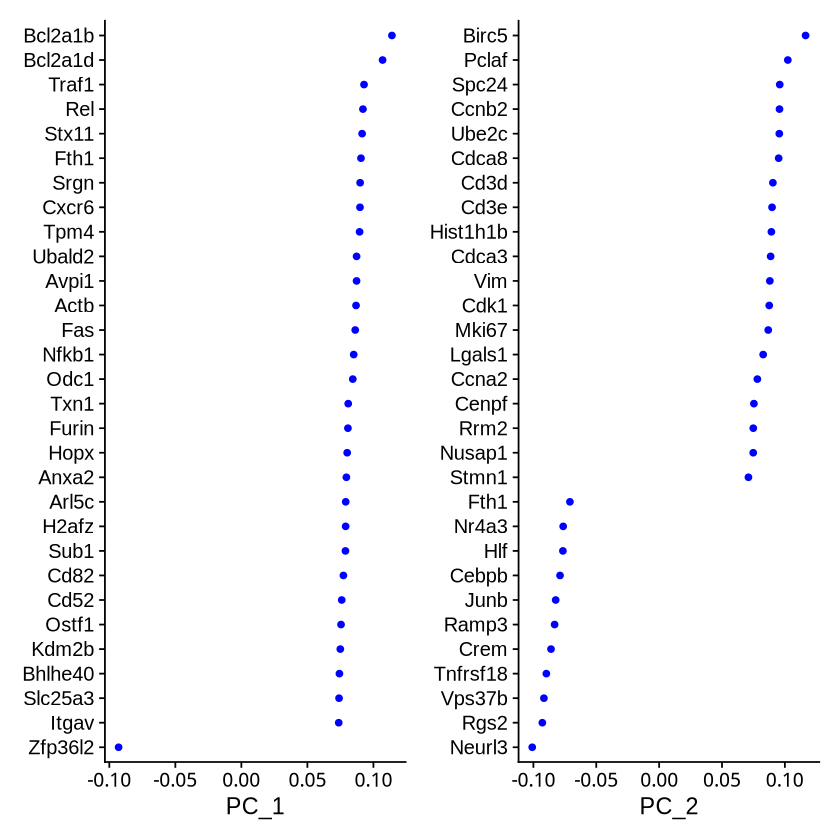

In [30]:
VizDimLoadings(GSE149622_RNA, dims = 1:2, reduction = "pca")

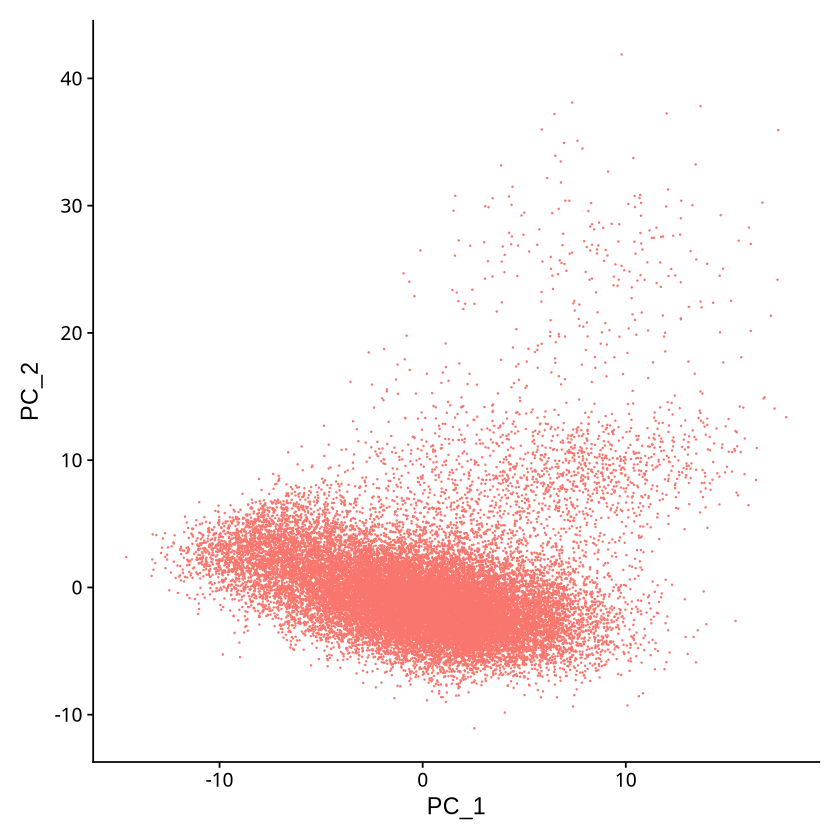

In [31]:
DimPlot(GSE149622_RNA, reduction = "pca") + NoLegend()

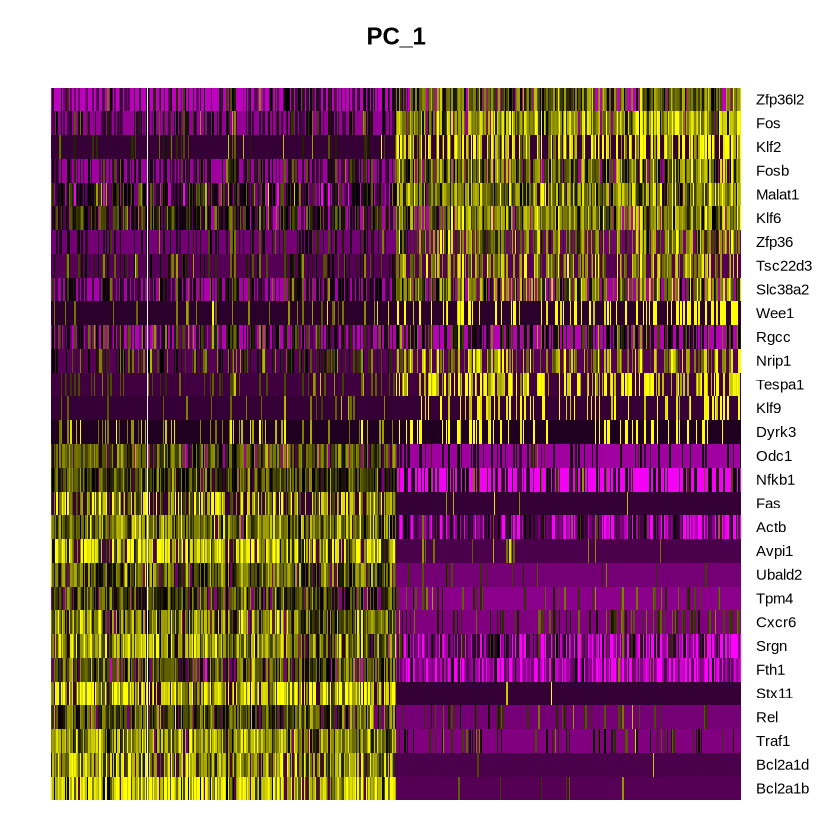

In [32]:
DimHeatmap(GSE149622_RNA, dims = 1, cells = 500, balanced = TRUE)

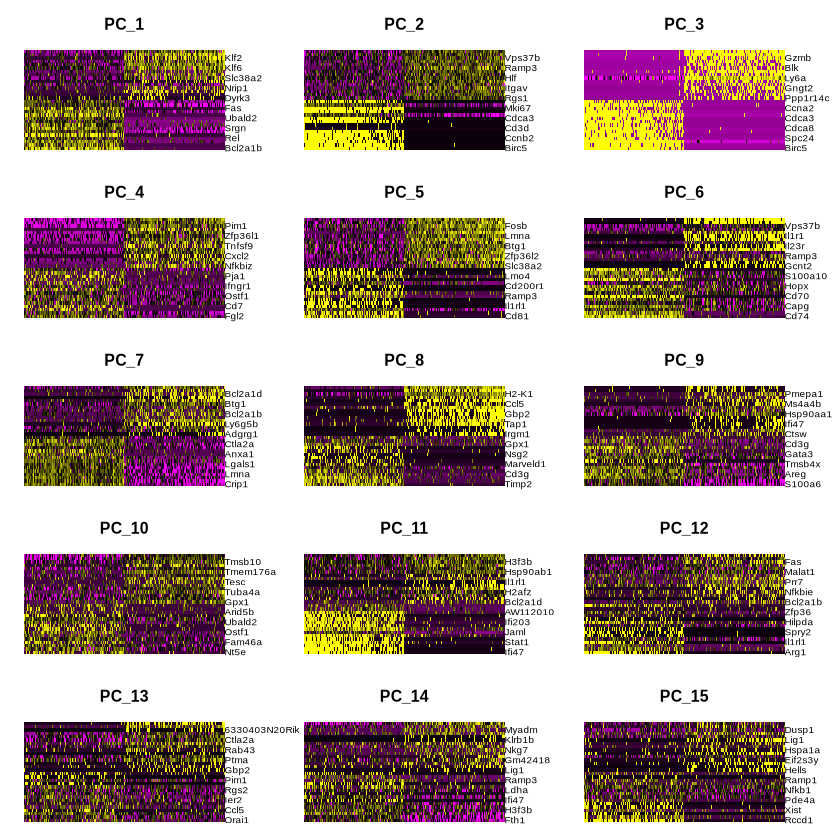

In [33]:
DimHeatmap(GSE149622_RNA, dims = 1:15, cells = 500, balanced = TRUE)

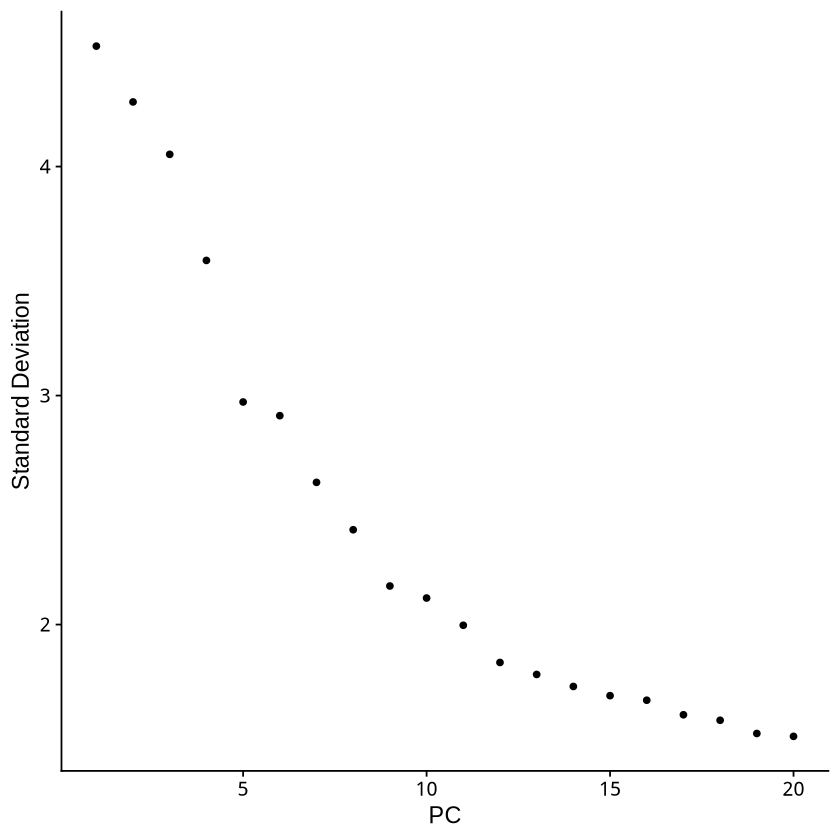

In [34]:
ElbowPlot(GSE149622_RNA)

In [ ]:
9,10でいい感じに曲がっているので10までデータを取って解析する

In [35]:
pGSE149622_RNA <- FindNeighbors(GSE149622_RNA, dims = 1:10)
GSE149622_RNA <- FindClusters(GSE149622_RNA, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



ERROR: Error in FindClusters.Seurat(GSE149622_RNA, resolution = 0.5): Provided graph.name not present in Seurat object


In [37]:
# PCAの実行
GSE149622_RNA <- RunPCA(GSE149622_RNA, features = VariableFeatures(object = GSE149622_RNA))

# 近傍グラフの作成
GSE149622_RNA <- FindNeighbors(GSE149622_RNA, dims = 1:10)

# クラスタリングの実行
GSE149622_RNA <- FindClusters(GSE149622_RNA, graph.name = "RNA_snn", resolution = 0.5)

PC_ 1 
Positive:  Bcl2a1b, Bcl2a1d, Traf1, Rel, Stx11, Fth1, Srgn, Cxcr6, Tpm4, Ubald2 
	   Avpi1, Actb, Fas, Nfkb1, Odc1, Txn1, Furin, Hopx, Anxa2, Arl5c 
	   H2afz, Sub1, Cd82, Cd52, Ostf1, Kdm2b, Bhlhe40, Slc25a3, Itgav, Orai1 
Negative:  Zfp36l2, Fos, Klf2, Fosb, Malat1, Klf6, Zfp36, Tsc22d3, Slc38a2, Wee1 
	   Rgcc, Nrip1, Tespa1, Klf9, Dyrk3, Gm42418, Rhob, Cd69, Il2, Egr1 
	   Gm26532, Dusp1, Gm26825, Txnip, Gm26802, Nr4a1, Rasgef1b, Id3, Cited2, Nfkbid 
PC_ 2 
Positive:  Birc5, Pclaf, Spc24, Ccnb2, Ube2c, Cdca8, Cd3d, Cd3e, Hist1h1b, Cdca3 
	   Vim, Cdk1, Mki67, Lgals1, Ccna2, Cenpf, Rrm2, Nusap1, Stmn1, Cit 
	   Kif11, Gzmb, Il1r1, Hmmr, Tpx2, Cks1b, Tcrg-C2, Il23r, Blk, Rbm3 
Negative:  Neurl3, Rgs2, Vps37b, Tnfrsf18, Crem, Ramp3, Junb, Cebpb, Hlf, Nr4a3 
	   Fth1, Itgav, Ifngr1, Nfkb1, Rgs1, Rel, Gata3, Eprs, P2ry10, Ifrd1 
	   Spty2d1, Ar, Jmy, Sub1, Igsf5, Cxcr4, Paxbp1, Areg, Nr4a2, Elovl5 
PC_ 3 
Positive:  Birc5, Pclaf, Stmn1, Spc24, Ube2c, Cdk1, Cdca8, Ccnb2, Hist1h1b,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26069
Number of edges: 698154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8113
Number of communities: 8
Elapsed time: 7 seconds


In [38]:
GSE149622_RNA <- FindNeighbors(GSE149622_RNA, dims = 1:10)

Computing nearest neighbor graph

Computing SNN



In [39]:
GSE149622_RNA <- FindClusters(GSE149622_RNA, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26069
Number of edges: 698154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8113
Number of communities: 8
Elapsed time: 8 seconds


In [40]:
# Look at cluster IDs of the first 5 cells
head(Idents(GSE149622_RNA), 5)

Timept0.AAACCCAAGCTATCTG Timept0.AAACCCAAGGTAATCA Timept0.AAACCCAAGTCTAACC 
                       3                        2                        1 
Timept0.AAACCCAAGTCTCTGA Timept0.AAACCCACACACCTGG 
                       0                        3 
Levels: 0 1 2 3 4 5 6 7

In [41]:
GSE149622_RNA <- RunUMAP(GSE149622_RNA, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:31:19 UMAP embedding parameters a = 0.9922 b = 1.112

13:31:19 Read 26069 rows and found 10 numeric columns

13:31:19 Using Annoy for neighbor search, n_neighbors = 30

13:31:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:31:22 Writing NN index file to temp file /tmp/Rtmpg4jgQV/file2b425a654011be

13:31:22 Searching Annoy index using 1 thread, search_k = 3000

13:31:31 Annoy recall = 100%

13:31:31 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

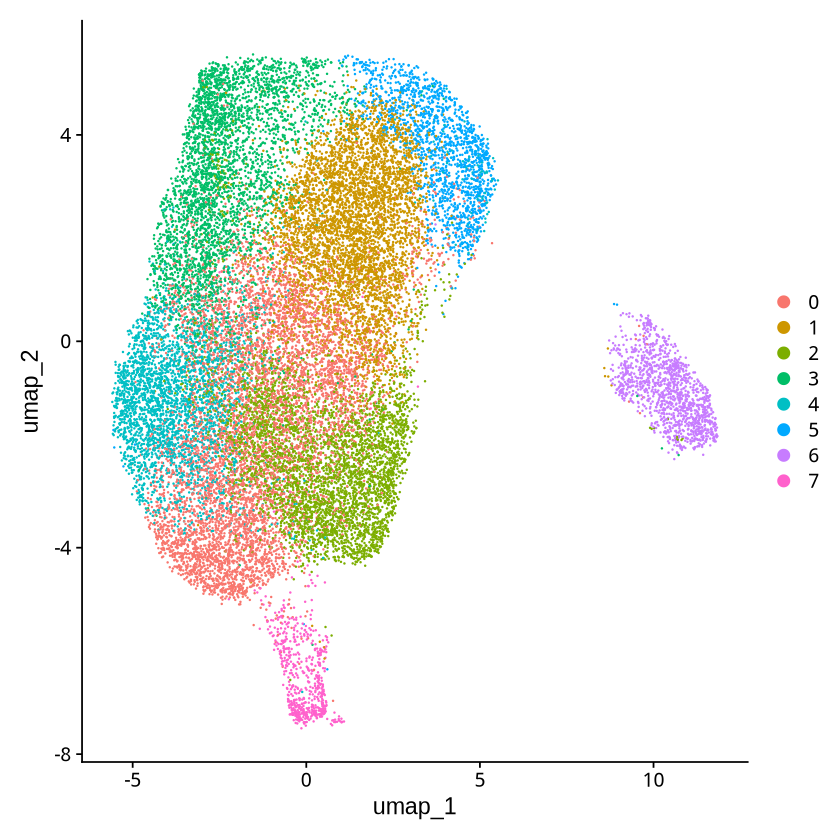

In [42]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(GSE149622_RNA, reduction = "umap")

In [43]:
names(GSE149622_RNA@reductions)

[1] "pca"  "umap"

In [42]:
GSE149622_RNA <- RunUMAP(GSE149622_RNA, dims = 1:10)

15:52:55 UMAP embedding parameters a = 0.9922 b = 1.112

15:52:55 Read 26069 rows and found 10 numeric columns

15:52:55 Using Annoy for neighbor search, n_neighbors = 30

15:52:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:52:57 Writing NN index file to temp file /tmp/RtmpJKvGXQ/file1a6b983e295bc9

15:52:57 Searching Annoy index using 1 thread, search_k = 3000

15:53:06 Annoy recall = 100%

15:53:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:53:07 Initializing from normalized Laplacian + noise (using RSpectra)

15:53:08 Commencing optimization for 200 epochs, with 1012600 positive edges

15:53:19 Optimization finished



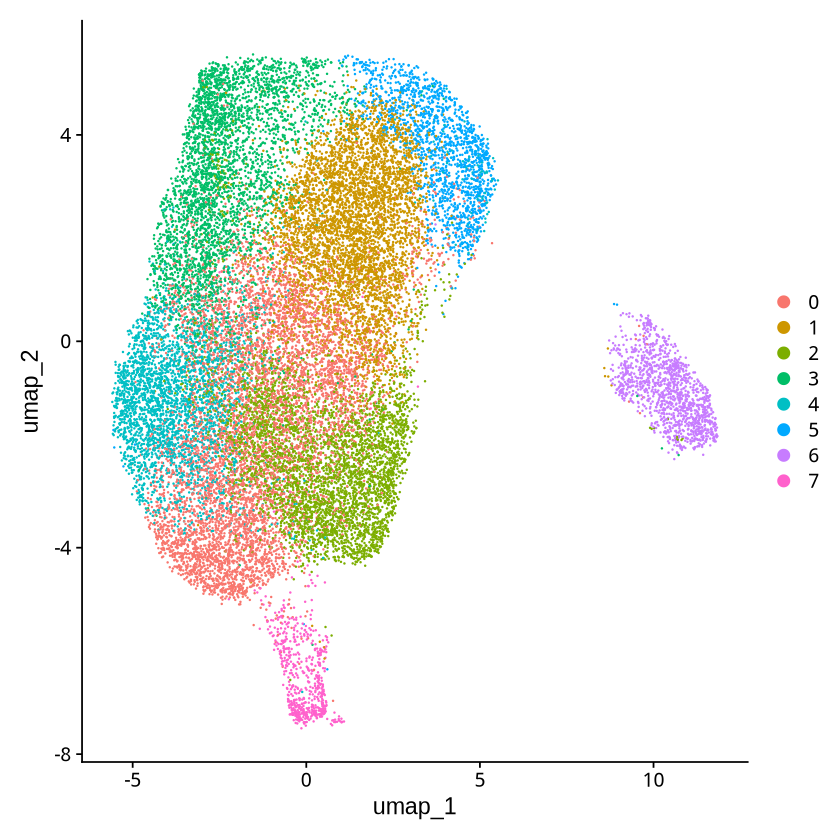

In [43]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(GSE149622_RNA, reduction = "umap")

In [38]:
saveRDS(GSE149622_RNA, file = "/home/harita/work/scRNA-seq/work/GSE149622_RNAver3のunajusted_tutorial2.rds")

In [3]:
GSE149622_RNA <- readRDS(file = "~/work/scRNA-seq/work/GSE149622_RNAver3のunajusted_tutorial2.rds")

In [44]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(GSE149622_RNA, ident.1 = 2)
head(cluster2.markers, n = 5)

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



p_val avg_log2FC pct.1 pct.2 p_val_adj
Bcl2a1d 0     1.731753   0.740 0.307 0        
Bcl2a1b 0     1.310869   0.760 0.389 0        
Bhlhe40 0     1.244778   0.835 0.467 0        
Syngr2  0     1.690680   0.597 0.243 0        
Rel     0     1.412858   0.926 0.577 0

In [5]:
# find all markers distinguishing cluster 5 from clusters 0 and 3
cluster5.markers <- FindMarkers(GSE149622_RNA, ident.1 = 5, ident.2 = c(0, 3))
head(cluster5.markers, n = 5)

p_val avg_log2FC pct.1 pct.2 p_val_adj
Crem   0     -2.775650  0.191 0.834 0        
Vps37b 0     -2.693524  0.325 0.923 0        
Ifrd1  0     -2.249964  0.276 0.858 0        
Cebpb  0     -2.230019  0.298 0.867 0        
Nr4a3  0     -2.400631  0.193 0.754 0

In [4]:
# クラスターごとに avg_log2FC > 1 のマーカーをフィルタリングしてファイルに書き出す
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)
df <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

# フィルタリングされたデータをファイルに保存
write.table(df, "~/work/scRNA-seq/work/GSE149622_RNA.markers.txt", row.names = FALSE, col.names = FALSE, sep = "\t", append = FALSE, quote = FALSE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [5]:
GSE149622_RNA.markers

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster
Lgals1          0.000000e+00 0.4823425  0.998 0.975  0.000000e+00 0      
Actg1           0.000000e+00 0.4686672  0.999 0.986  0.000000e+00 0      
S100a4          0.000000e+00 0.3761174  0.998 0.994  0.000000e+00 0      
S100a6          0.000000e+00 0.4881121  0.999 0.996  0.000000e+00 0      
S100a11        3.394702e-288 0.4303089  0.987 0.938 5.717357e-284 0      
Vim            5.384385e-287 0.3978098  0.998 0.988 9.068382e-283 0      
Actb           9.147112e-275 0.3766080  1.000 0.997 1.540557e-270 0      
Crip1          3.616267e-229 0.3972861  0.999 0.993 6.090516e-225 0      
Anxa2          1.794928e-224 0.5559524  0.828 0.627 3.023018e-220 0      
Lmna           7.453723e-224 0.3888687  0.989 0.933 1.255356e-219 0      
Neurl3         9.329591e-210 0.4226922  0.963 0.820 1.571290e-205 0      
Rgs1           9.484805e-210 0.4888904  0.953 0.837 1.597431e-205 0      
S100a10        7.782035e-209 0.3263144  0.995 0.966 1.310650e-204 0      
Icos           8.495218e-191 0.4252619  0.935 0.785 1.430765e-186 0      
Cotl1          1.025947e-190 0.4454975  0.920 0.800 1.727900e-186 0      
Ifngr1         1.952495e-188 0.4679526  0.894 0.723 3.288392e-184 0      
Myl6           4.488906e-188 0.3738488  0.968 0.907 7.560215e-184 0      
Calm1          8.355921e-187 0.3211466  0.993 0.957 1.407304e-182 0      
Fgl2           9.053784e-180 0.5518319  0.760 0.569 1.524838e-175 0      
Glrx           1.130446e-178 0.7449134  0.535 0.338 1.903897e-174 0      
Ms4a4b         1.831093e-174 1.4151426  0.248 0.109 3.083927e-170 0      
Sub1           1.937091e-174 0.3870370  0.982 0.908 3.262449e-170 0      
Itm2b          1.059104e-169 0.2542261  0.998 0.986 1.783744e-165 0      
Nkg7           8.816162e-166 0.6897578  0.577 0.389 1.484818e-161 0      
Lmnb1          5.049503e-154 0.7235849  0.515 0.332 8.504373e-150 0      
Txn1           1.054739e-149 0.4056711  0.886 0.745 1.776391e-145 0      
Ubald2         1.799989e-145 0.5009483  0.744 0.562 3.031541e-141 0      
H2-K1          1.327188e-138 0.3112703  0.995 0.973 2.235250e-134 0      
Vps37b         1.143967e-127 0.3076328  0.935 0.784 1.926669e-123 0      
Gapdh          6.408031e-124 0.2646078  0.981 0.943 1.079241e-119 0      
⋮              ⋮             ⋮          ⋮     ⋮     ⋮             ⋮      
Fastkd5        0.008801293   0.9517051  0.018 0.008 1             7      
Tti1           0.008814065   0.3291732  0.027 0.014 1             7      
Zadh22         0.008833936   0.2246656  0.095 0.065 1             7      
Gm73241        0.008897561   0.7812860  0.020 0.009 1             7      
Slx4ip         0.008913991   0.2230412  0.040 0.023 1             7      
Mrps27         0.008944957   0.7585556  0.022 0.010 1             7      
1810058I24Rik1 0.008950163   0.1670791  0.449 0.354 1             7      
Mex3d1         0.009036057   0.1468315  0.060 0.038 1             7      
Ifng1          0.009074054   0.8835922  0.013 0.005 1             7      
Ccng2          0.009128984   0.1016743  0.163 0.120 1             7      
Ttc7b1         0.009145341   0.2696042  0.048 0.029 1             7      
Ldah1          0.009158179   0.1801248  0.088 0.060 1             7      
Insig2         0.009197134   0.1117381  0.136 0.098 1             7      
Trim141        0.009284573   0.4236214  0.025 0.013 1             7      
Med61          0.009359844   0.1121333  0.075 0.049 1             7      
Nutf2          0.009364503   0.9242552  0.015 0.006 1             7      
Pck2           0.009408822   0.2670628  0.035 0.019 1             7      
Zfp5231        0.009415058   0.3708346  0.058 0.037 1             7      
Mrpl101        0.009488640   0.4265336  0.058 0.037 1             7      
Pank32         0.009725373   0.1324399  0.128 0.092 1             7      
Rpgrip1l       0.009770459   0.5689406  0.018 0.008 1             7      
Slc4a111       0.009773514   0.8376453  0.018 0.008 1             7      
Smim202        0.00

In [7]:
cluster0.markers <- FindMarkers(GSE149622_RNA, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)

In [43]:
geneset1 <- row.names(cluster0.markers)

myAUC avg_diff    power avg_log2FC pct.1 pct.2
S100a6        0.694 0.3338417   0.388 0.4881121  0.999 0.996
Lgals1        0.678 0.3226764   0.356 0.4823425  0.998 0.975
Actg1         0.678 0.3150873   0.356 0.4686672  0.999 0.986
S100a4        0.664 0.2554781   0.328 0.3761174  0.998 0.994
S100a11       0.649 0.2786349   0.298 0.4303089  0.987 0.938
Vim           0.649 0.2695987   0.298 0.3978098  0.998 0.988
Actb          0.646 0.2559318   0.292 0.3766080  1.000 0.997
Crip1         0.633 0.2712974   0.266 0.3972861  0.999 0.993
Lmna          0.632 0.2557396   0.264 0.3888687  0.989 0.933
Anxa2         0.630 0.3151167   0.260 0.5559524  0.828 0.627
S100a10       0.627 0.2151981   0.254 0.3263144  0.995 0.966
Rgs1          0.627 0.3202100   0.254 0.4888904  0.953 0.837
Neurl3        0.627 0.2679142   0.254 0.4226922  0.963 0.820
Cotl1         0.621 0.2667318   0.242 0.4454975  0.920 0.800
Icos          0.621 0.2628205   0.242 0.4252619  0.935 0.785
Calm1         0.620 0.2079831   0.240 0.3211466  0.993 0.957
Myl6          0.620 0.2349117   0.240 0.3738488  0.968 0.907
Ifngr1        0.620 0.2806526   0.240 0.4679526  0.894 0.723
Sub1          0.616 0.2518411   0.232 0.3870370  0.982 0.908
Itm2b         0.614 0.1677435   0.228 0.2542261  0.998 0.986
Fgl2          0.614 0.3121135   0.228 0.5518319  0.760 0.569
Txn1          0.607 0.2393092   0.214 0.4056711  0.886 0.745
H2-K1         0.603 0.2057854   0.206 0.3112703  0.995 0.973
Glrx          0.603 0.3167077   0.206 0.7449134  0.535 0.338
Ubald2        0.603 0.2788401   0.206 0.5009483  0.744 0.562
Nkg7          0.602 0.3570513   0.204 0.6897578  0.577 0.389
Vps37b        0.599 0.1955073   0.198 0.3076328  0.935 0.784
Gapdh         0.598 0.1689144   0.196 0.2646078  0.981 0.943
Lmnb1         0.595 0.3038842   0.190 0.7235849  0.515 0.332
Cfl1          0.594 0.1798607   0.188 0.2905503  0.959 0.894
⋮             ⋮     ⋮           ⋮     ⋮          ⋮     ⋮    
Gm14029       0.502 0.007336571 0.004 0.3862978  0.014 0.010
Shf           0.502 0.007090604 0.004 0.3834486  0.014 0.009
Stard9        0.502 0.004087302 0.004 0.3283064  0.010 0.006
Capn3         0.502 0.005719063 0.004 0.3375158  0.013 0.009
Jmjd7         0.502 0.005662196 0.004 0.3010580  0.014 0.010
Map3k20       0.502 0.010635001 0.004 0.9576429  0.010 0.005
Hc            0.502 0.005439354 0.004 0.4860503  0.010 0.006
Fibcd1        0.502 0.007893558 0.004 0.7168652  0.010 0.005
Qrfp          0.502 0.004971732 0.004 0.3700855  0.010 0.006
Phlda3        0.502 0.009348074 0.004 0.5084073  0.012 0.008
9430060I03Rik 0.502 0.006111054 0.004 0.2787945  0.017 0.012
Tmem198       0.502 0.005743068 0.004 0.2993622  0.015 0.011
Abcb6         0.502 0.005459199 0.004 0.3721363  0.011 0.008
Fastkd2       0.502 0.007061461 0.004 0.2565770  0.021 0.016
Rsph9         0.501 0.004731652 0.002 0.2611463  0.012 0.011
Zfp58         0.501 0.003742414 0.002 0.2516717  0.011 0.008
Zfp874a       0.501 0.005114838 0.002 0.3047588  0.013 0.010
Map2k3os      0.501 0.004580453 0.002 0.3252617  0.011 0.009
Gm39469       0.501 0.004374611 0.002 0.2824937  0.012 0.009
Tarbp1        0.501 0.004523928 0.002 0.2598700  0.012 0.009
9130019O22Rik 0.501 0.005094165 0.002 0.3539063  0.011 0.008
Lins1         0.501 0.003557491 0.002 0.2801515  0.010 0.007
Zfp772        0.501 0.004586695 0.002 0.3423171  0.010 0.007
Hspb1         0.501 0.007967019 0.002 0.3912688  0.010 0.008
Sp5           0.501 0.004545779 0.002 0.3189961  0.010 0.008
Ifi213        0.501 0.007633310 0.002 0.4922708  0.011 0.008
Mpzl1         0.501 0.006617531 0.002 0.3131817  0.014 0.012
Gramd3        0.500 0.016312385 0.000 0.3097371  0.025 0.025
Gimap6        0.500 0.005207341 0.000 0.2502676  0.011 0.011
Fn1           0.500 0.005761127 0.000 0.2906786  0.010 0.009

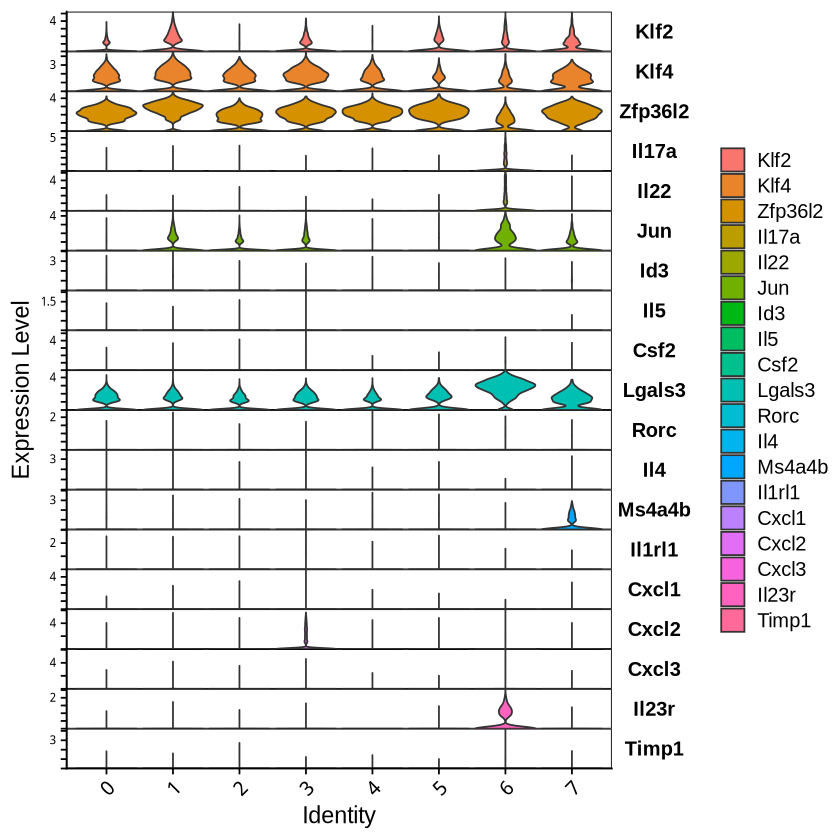

In [8]:
VlnPlot(GSE149622_RNA, features = c("Klf2", "Klf4", "Zfp36l2", "Il17a", "Il22", "Jun", "Id3", 
                                                              "Il5", "Csf2", "Lgals3", "Rorc", "Il4", "Ms4a4b", 
                                                              "Il1rl1", "Cxcl1", "Cxcl2", "Cxcl3", "Il23r", "Timp1"),
                                  stack = TRUE, flip = TRUE)

In [8]:
# ggplot2パッケージの読み込み
library(ggplot2)

# VlnPlotの作成
p <- VlnPlot(
  GSE149622_RNA, 
  features = c(
    "Glrx",  # クラスター0
      "Klf2", # クラスター1
    "Cd70",              # クラスター2
    "Cxcl2", "Cd9",      # クラスター3
     "Krt83",  # クラスター4
      "Tespa1", # クラスター5
    "Il23r", "Il22", "Il17f",  # クラスター6
    "Ms4a4b"             # クラスター7
  ),
  stack = TRUE, 
  flip = TRUE
)

# PNG形式で保存
ggsave("VlnPlot_expanded1.png", plot = p, width = 10, height = 8, dpi = 300)


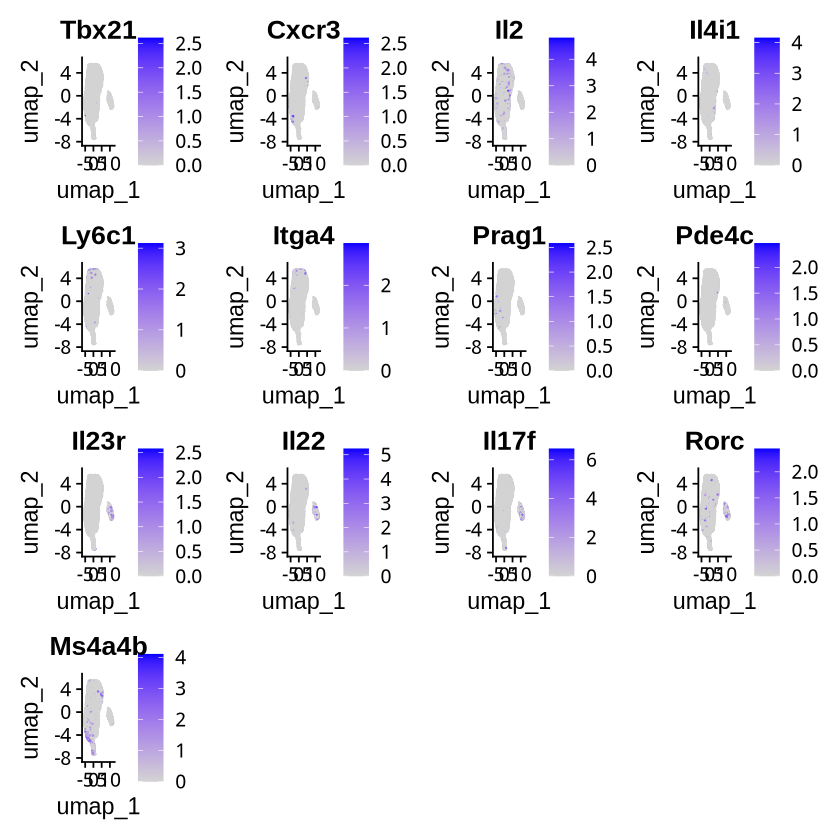

In [30]:
FeaturePlot(
  GSE149622_RNA, 
  features = c(
    "Tbx21", "Cxcr3",     # クラスター0
    "Il2",                # クラスター1
    "Il4i1",              # クラスター2
    "Ly6c1", "Itga4",     # クラスター3
    "Prag1",              # クラスター4
    "Pde4c",              # クラスター5
    "Il23r", "Il22", "Il17f", "Rorc",  # クラスター6
    "Ms4a4b"              # クラスター7
  )
)
width = 50, height = 50)

In [39]:
# ggplot2パッケージの読み込み
library(ggplot2)

# FeaturePlotの作成
p <- FeaturePlot(
  GSE149622_RNA, 
  features = c(
    "Tbx21", "Cxcr3",     # クラスター0
    "Il2",                # クラスター1
    "Il4i1",              # クラスター2
    "Ly6c1", "Itga4",     # クラスター3
    "Prag1",              # クラスター4
    "Pde4c",              # クラスター5
    "Il23r", "Il22", "Il17f", "Rorc",  # クラスター6
    "Ms4a4b"              # クラスター7
  )
)

# サイズ制限を解除して保存
ggsave("FeaturePlot_expanded.png", plot = p, width = 12, height = 10, dpi = 300)

In [9]:
# GSE149622_RNAのデータを保存
saveRDS(GSE149622_RNA, file = "/home/harita/work/scRNA-seq/work/GSE149622_RNAver3のunajusted_tutorial2.rds")

# 各クラスターのマーカー遺伝子を特定（クラスター0〜7）
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# クラスター0から7までのマーカー遺伝子をフィルタリングし、平均対数変換FC（fold change）が1以上のものに限定
cluster_markers <- GSE149622_RNA.markers %>%
    dplyr::filter(cluster %in% 0:7 & avg_log2FC > 1) %>%
    group_by(cluster)

# 最初の数行を表示
head(cluster_markers)


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene  
1 1.831093e-174 1.415143   0.248 0.109 3.083927e-170 0       Ms4a4b
2 1.960658e-114 1.577323   0.208 0.101 3.302139e-110 0       Ccl5  
3  6.612005e-70 1.492285   0.114 0.051  1.113594e-65 0       Igtp  
4  6.410392e-65 2.088609   0.059 0.019  1.079638e-60 0       H2-Aa 
5  7.867877e-60 1.436260   0.086 0.036  1.325108e-55 0       H2-Eb1
6  4.136970e-53 1.362473   0.091 0.042  6.967485e-49 0       H2-Ab1

In [10]:
# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    filter(avg_log2FC == max(avg_log2FC)) %>%
    ungroup()

# 結果を表示
print(top_markers)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



# A tibble: 8 × 7
      p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene    
      <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>   
1 2.45e- 49       2.59 0.024 0.004 4.12e- 45 0       Cxcr3   
2 0               2.07 0.497 0.264 0         1       Klf2    
3 1.59e-163       4.43 0.057 0.005 2.68e-159 2       Tff1    
4 2.67e- 98       6.42 0.021 0     4.50e- 94 3       Stxbp6  
5 1.50e- 39       2.72 0.026 0.005 2.52e- 35 4       AI854703
6 7.35e- 39       5.79 0.011 0     1.24e- 34 5       Sat2    
7 9.23e-218       9.56 0.041 0     1.55e-213 6       Gm9961  
8 0               8.97 0.159 0     0         7       Pimreg  


In [11]:
# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な上位5つの遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    slice_max(order_by = avg_log2FC, n = 5) %>%
    ungroup()

# 結果を表示
print(top_markers)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



# A tibble: 40 × 7
       p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene  
       <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr> 
 1 2.45e- 49       2.59 0.024 0.004 4.12e- 45 0       Cxcr3 
 2 6.41e- 65       2.09 0.059 0.019 1.08e- 60 0       H2-Aa 
 3 4.51e- 32       1.83 0.028 0.008 7.59e- 28 0       Fcer1g
 4 1.96e-114       1.58 0.208 0.101 3.30e-110 0       Ccl5  
 5 7.32e- 11       1.55 0.011 0.004 1.23e-  6 0       Igkc  
 6 0               2.07 0.497 0.264 0         1       Klf2  
 7 3.09e-  8       1.88 0.01  0.004 5.20e-  4 1       Gpr82 
 8 1.04e-118       1.80 0.221 0.107 1.75e-114 1       Il2   
 9 4.47e- 65       1.59 0.125 0.058 7.53e- 61 1       Spry1 
10 1.28e- 59       1.53 0.18  0.104 2.15e- 55 1       Hspa1a
# ℹ 30 more rows


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



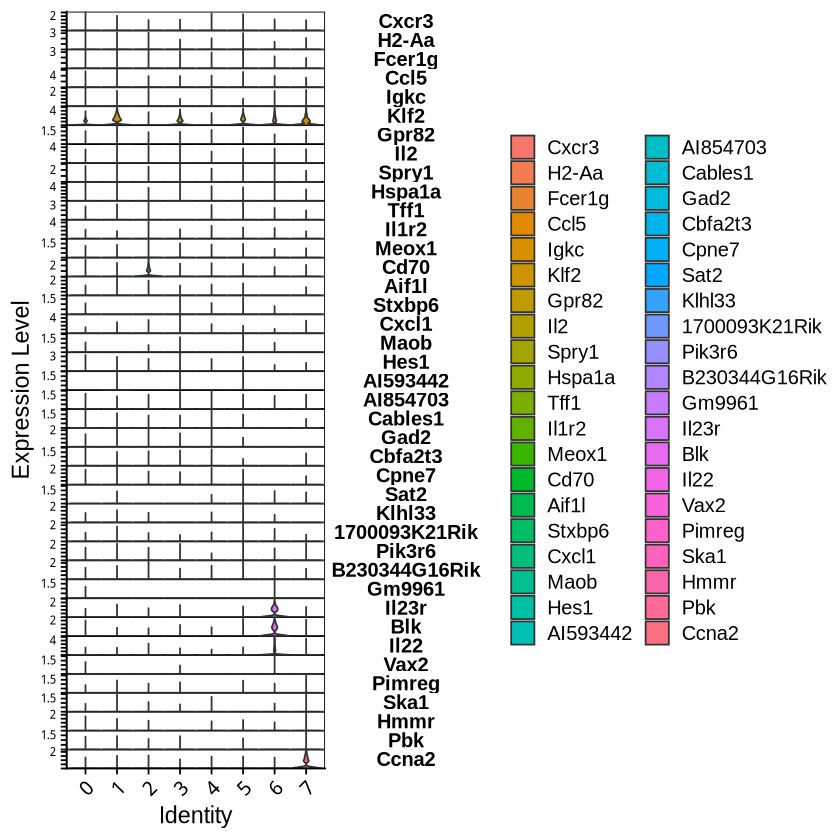

In [14]:
# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な上位5つの遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    slice_max(order_by = avg_log2FC, n = 5) %>%
    ungroup()

# 上位の遺伝子リストを作成
top_genes <- unique(top_markers$gene)

# Violin Plotの作成
vlnplot_selected_genes <- VlnPlot(GSE149622_RNA, features = top_genes, stack = TRUE, flip = TRUE)
vlnplot_selected_genes

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



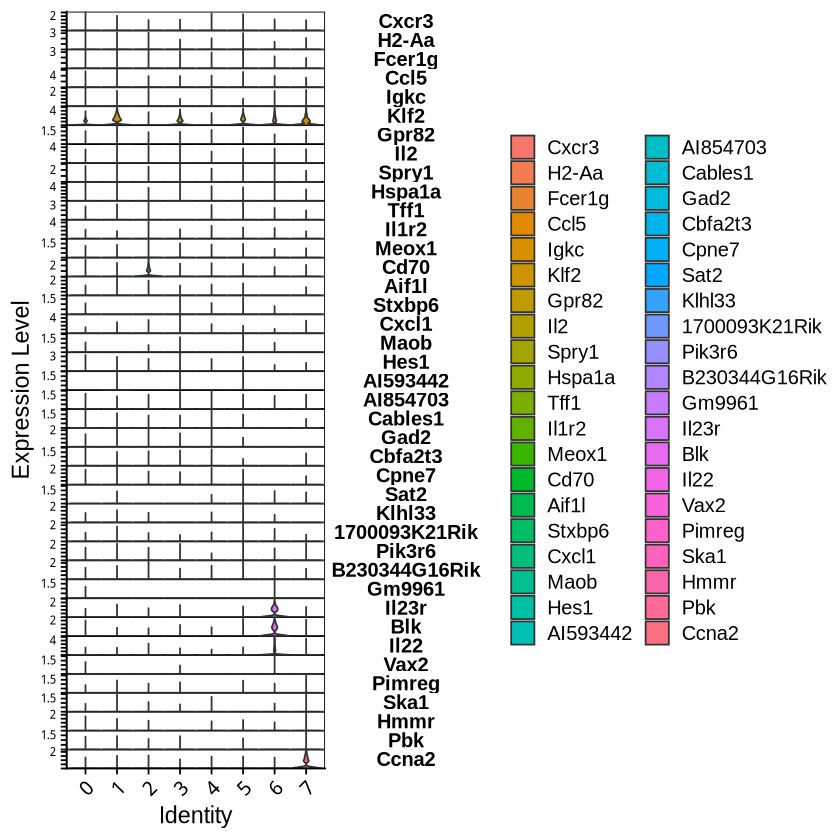

In [15]:
# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な上位5つの遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    slice_max(order_by = avg_log2FC, n = 5) %>%
    ungroup()

# 上位の遺伝子リストを作成
top_genes <- unique(top_markers$gene)

# Violin Plotの作成と表示
vlnplot_selected_genes <- VlnPlot(GSE149622_RNA, features = top_genes, stack = TRUE, flip = TRUE)
vlnplot_selected_genes


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



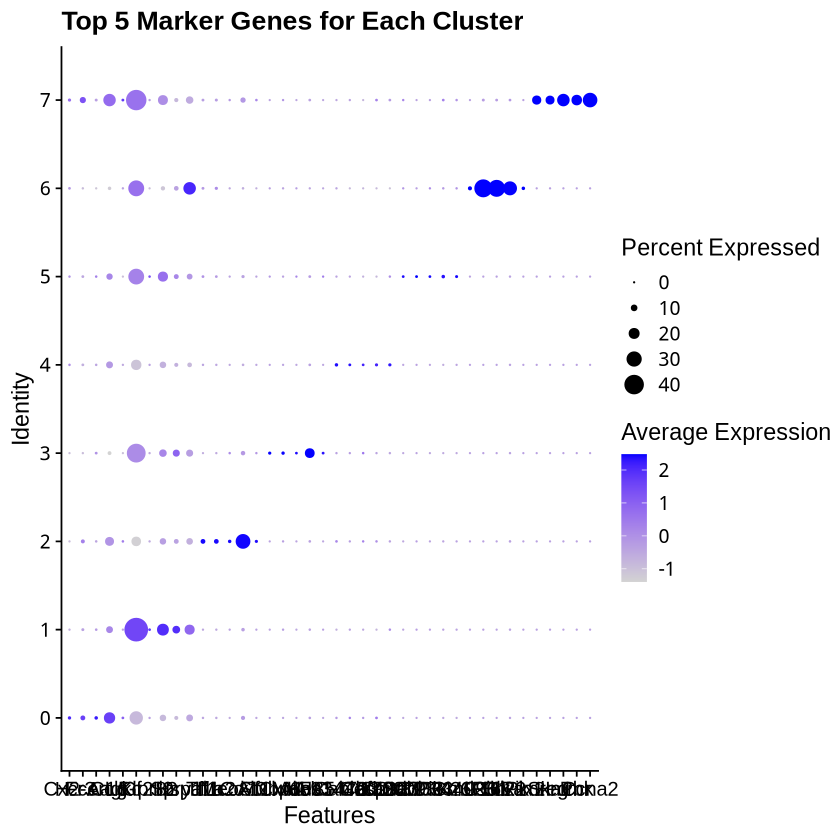

In [19]:
# ggplot2パッケージの読み込み
library(ggplot2)

# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な上位5つの遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    slice_max(order_by = avg_log2FC, n = 5) %>%
    ungroup()

# 上位の遺伝子リストを作成
top_genes <- unique(top_markers$gene)

# Dot Plotの作成と表示
dotplot_selected_genes <- DotPlot(GSE149622_RNA, features = top_genes) +
    ggtitle("Top 5 Marker Genes for Each Cluster")
dotplot_selected_genes


In [21]:
# ggplot2パッケージの読み込み
library(ggplot2)

# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な上位5つの遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    slice_max(order_by = avg_log2FC, n = 5) %>%
    ungroup()

# 上位の遺伝子リストを作成
top_genes <- unique(top_markers$gene)

# Violin Plotの作成
vlnplot_selected_genes <- VlnPlot(GSE149622_RNA, features = top_genes, stack = TRUE, flip = TRUE)

# PNGで保存
png(filename = "~/work/scRNA-seq/work/vlnplot_selected_genes.png", width = 800, height = 600)
print(vlnplot_selected_genes)
dev.off()


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



pdf 
  2

In [22]:
# Dot Plotの作成
dotplot_selected_genes <- DotPlot(GSE149622_RNA, features = top_genes) +
    ggtitle("Top 5 Marker Genes for Each Cluster")

# PNGで保存
png(filename = "~/work/scRNA-seq/work/dotplot_selected_genes.png", width = 800, height = 600)
print(dotplot_selected_genes)
dev.off()


pdf 
  2

In [23]:
# ggplot2パッケージの読み込み
library(ggplot2)

# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な上位2つの遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    slice_max(order_by = avg_log2FC, n = 2) %>%
    ungroup()

# 上位の遺伝子リストを作成
top_genes <- unique(top_markers$gene)

# Violin Plotの作成
vlnplot_selected_genes <- VlnPlot(GSE149622_RNA, features = top_genes, stack = TRUE, flip = TRUE)

# PNGで保存
png(filename = "~/work/scRNA-seq/work/vlnplot_selected_genes.png", width = 800, height = 600)
print(vlnplot_selected_genes)
dev.off()


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



pdf 
  2

In [24]:
# Dot Plotの作成
dotplot_selected_genes <- DotPlot(GSE149622_RNA, features = top_genes) +
    ggtitle("Top 2 Marker Genes for Each Cluster")

# PNGで保存
png(filename = "~/work/scRNA-seq/work/dotplot_selected_genes.png", width = 800, height = 600)
print(dotplot_selected_genes)
dev.off()


pdf 
  2

In [25]:
# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な上位2つの遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    slice_max(order_by = avg_log2FC, n = 2) %>%
    ungroup()

# 各クラスターごとにマーカー遺伝子を表示
top_marker_list <- split(top_markers, top_markers$cluster)
print(top_marker_list)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



$`0`
# A tibble: 2 × 7
     p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene 
     <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>
1 2.45e-49       2.59 0.024 0.004  4.12e-45 0       Cxcr3
2 6.41e-65       2.09 0.059 0.019  1.08e-60 0       H2-Aa

$`1`
# A tibble: 2 × 7
         p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene 
         <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>
1 0                  2.07 0.497 0.264  0        1       Klf2 
2 0.0000000309       1.88 0.01  0.004  0.000520 1       Gpr82

$`2`
# A tibble: 2 × 7
      p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene 
      <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>
1 1.59e-163       4.43 0.057 0.005 2.68e-159 2       Tff1 
2 1.76e-141       4.31 0.056 0.006 2.97e-137 2       Il1r2

$`3`
# A tibble: 2 × 7
     p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene  
     <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr> 
1 2.67e-98       6.42 0.021 0      4.50e-94 3       Stxbp6
2 6.40e-60  

In [27]:
# 各クラスターの上位2つのマーカー遺伝子をリストに追加
selected_genes <- c("Cxcr3", "H2-Aa", "Klf2", "Gpr82", "Tff1", "Il1r2", 
                    "Stxbp6", "Cxcl1", "AI854703", "Cables1", "Sat2", "Klhl33", 
                    "Gm9961", "Il23r", "Pimreg", "Ska1")

# Violin Plotの作成
vlnplot_selected_genes <- VlnPlot(GSE149622_RNA, features = selected_genes, stack = TRUE, flip = TRUE)

# PNGで保存
png(filename = "~/work/scRNA-seq/work/vlnplot_selected_genes.png", width = 800, height = 600)
print(vlnplot_selected_genes)
dev.off()



pdf 
  2

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



# A tibble: 16 × 7
       p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene    
       <dbl>      <dbl> <dbl> <dbl>     <dbl> <fct>   <chr>   
 1 2.45e- 49       2.59 0.024 0.004 4.12e- 45 0       Cxcr3   
 2 6.41e- 65       2.09 0.059 0.019 1.08e- 60 0       H2-Aa   
 3 0               2.07 0.497 0.264 0         1       Klf2    
 4 3.09e-  8       1.88 0.01  0.004 5.20e-  4 1       Gpr82   
 5 1.59e-163       4.43 0.057 0.005 2.68e-159 2       Tff1    
 6 1.76e-141       4.31 0.056 0.006 2.97e-137 2       Il1r2   
 7 2.67e- 98       6.42 0.021 0     4.50e- 94 3       Stxbp6  
 8 6.40e- 60       5.17 0.025 0.003 1.08e- 55 3       Cxcl1   
 9 1.50e- 39       2.72 0.026 0.005 2.52e- 35 4       AI854703
10 1.49e- 13       2.28 0.013 0.004 2.51e-  9 4       Cables1 
11 7.35e- 39       5.79 0.011 0     1.24e- 34 5       Sat2    
12 2.42e- 42       5.41 0.012 0     4.07e- 38 5       Klhl33  
13 9.23e-218       9.56 0.041 0     1.55e-213 6       Gm9961  
14 0               8.65 0.363 0.001 

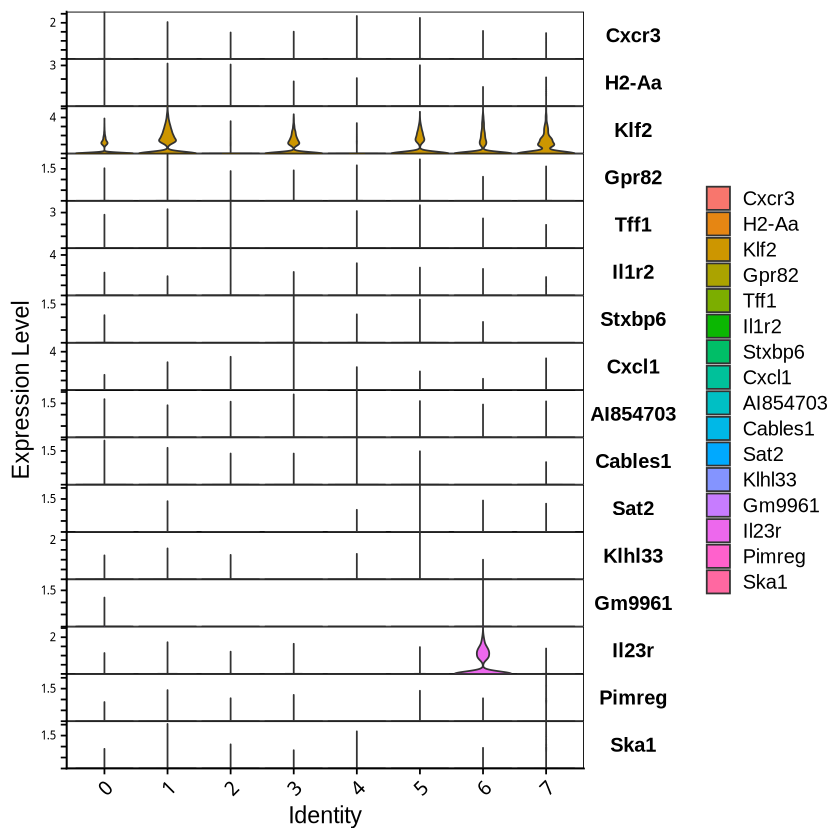

In [28]:
# ggplot2パッケージの読み込み
library(ggplot2)
library(dplyr)

# 各クラスターのマーカー遺伝子を特定
GSE149622_RNA.markers <- FindAllMarkers(GSE149622_RNA, only.pos = TRUE)

# 各クラスターで最も特徴的な上位2つの遺伝子を取得
top_markers <- GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    slice_max(order_by = avg_log2FC, n = 2) %>%
    ungroup()

# 表として表示
print(top_markers)

# 上位の遺伝子リストを作成
selected_genes <- unique(top_markers$gene)

# Violin Plotの作成と表示
vlnplot_selected_genes <- VlnPlot(GSE149622_RNA, features = selected_genes, stack = TRUE, flip = TRUE)
vlnplot_selected_genes


In [7]:
# 上位の10の変動遺伝子を確認
top10 <- head(VariableFeatures(GSE149622_RNA), 10)
print(top10)

 [1] "Il17f"  "Il22"   "Cxcl3"  "Cxcl2"  "Gzmb"   "Il17a"  "Ccl1"   "Cxcl10"
 [9] "Hspa1a" "Cxcl1" 


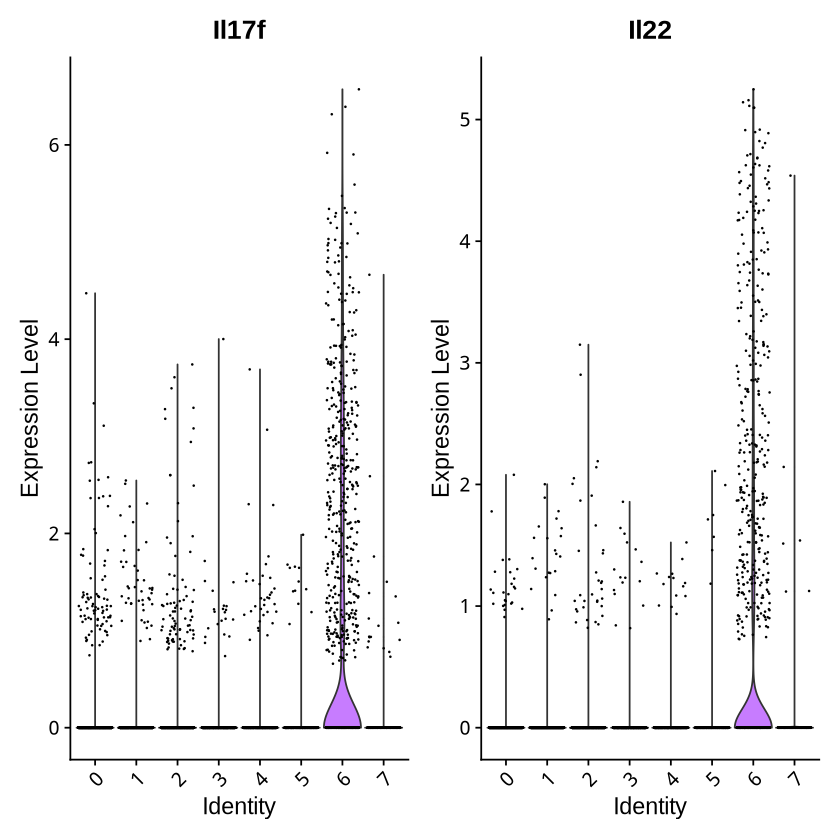

In [8]:
VlnPlot(GSE149622_RNA, features = c("Il17f", "Il22"))

In [ ]:
# 生のカウントデータをログスケールでプロット
VlnPlot(GSE149622_RNA, features = c("GENE3", "GENE4"), slot = "counts", log = TRUE)

Warning message:
“The `slot` argument of `VlnPlot()` is deprecated as of Seurat 5.0.0.
ℹ Please use the `layer` argument instead.”


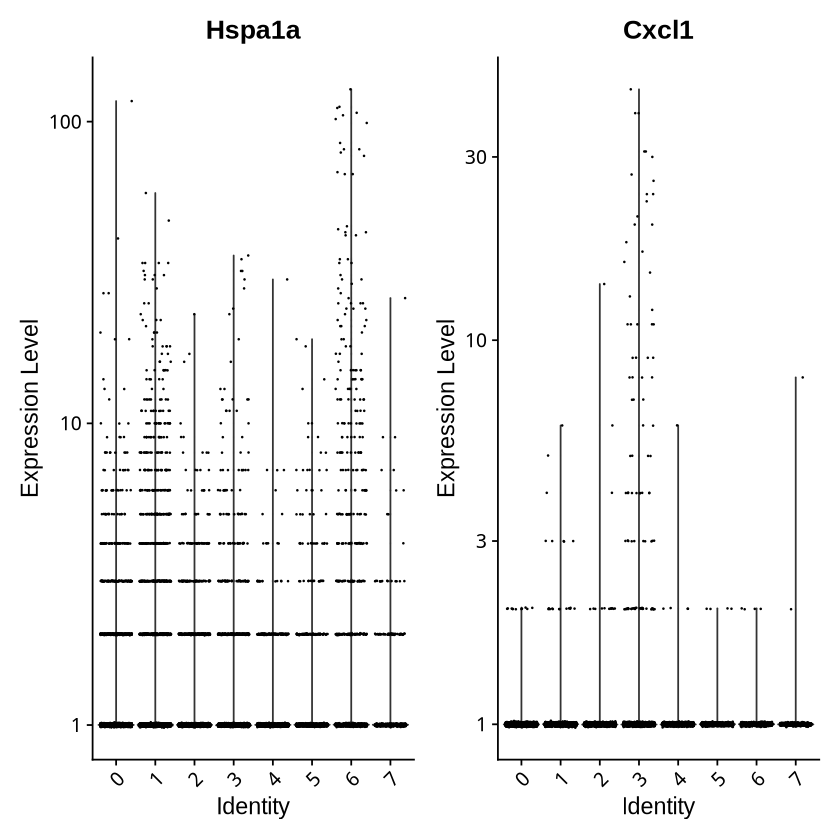

In [47]:
# 生のカウントデータをログスケールでプロット
VlnPlot(GSE149622_RNA, features = c("Hspa1a", "Cxcl1"), slot = "counts", log = TRUE)

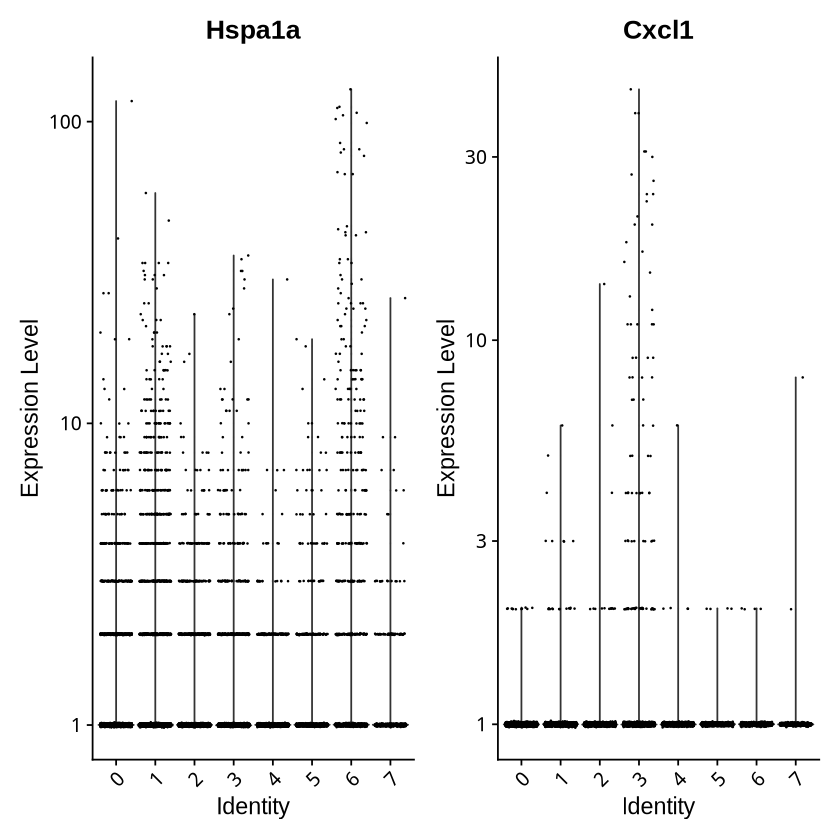

In [48]:
# 生のカウントデータをログスケールでプロット
VlnPlot(GSE149622_RNA, features = c("Hspa1a", "Cxcl1"), layer = "counts", log = TRUE)

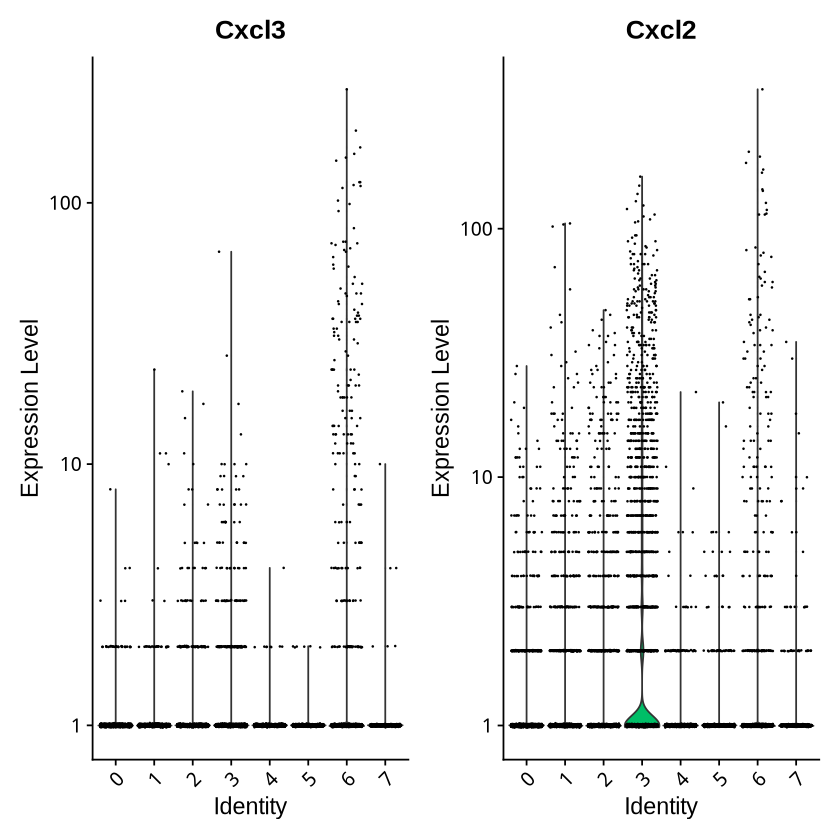

In [49]:
VlnPlot(GSE149622_RNA, features = c("Cxcl3", "Cxcl2"), layer = "counts", log = TRUE) 

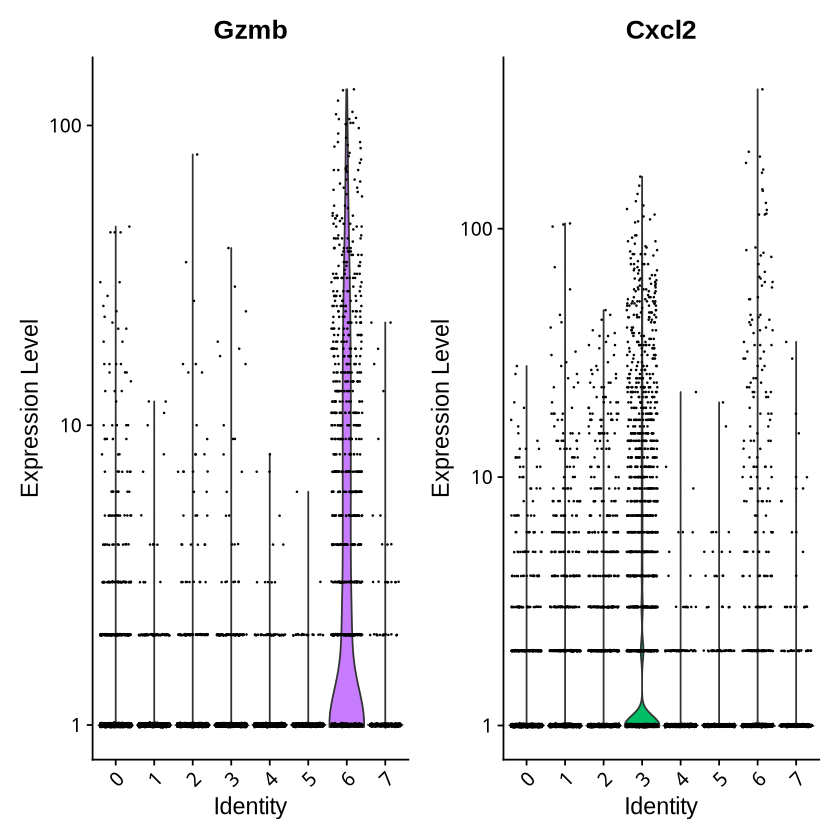

In [50]:
VlnPlot(GSE149622_RNA, features = c( "Gzmb" , "Cxcl2"), layer = "counts", log = TRUE) 

In [7]:
# 上位の10の変動遺伝子を表示する
top10 <- head(VariableFeatures(GSE149622_RNA), 10)

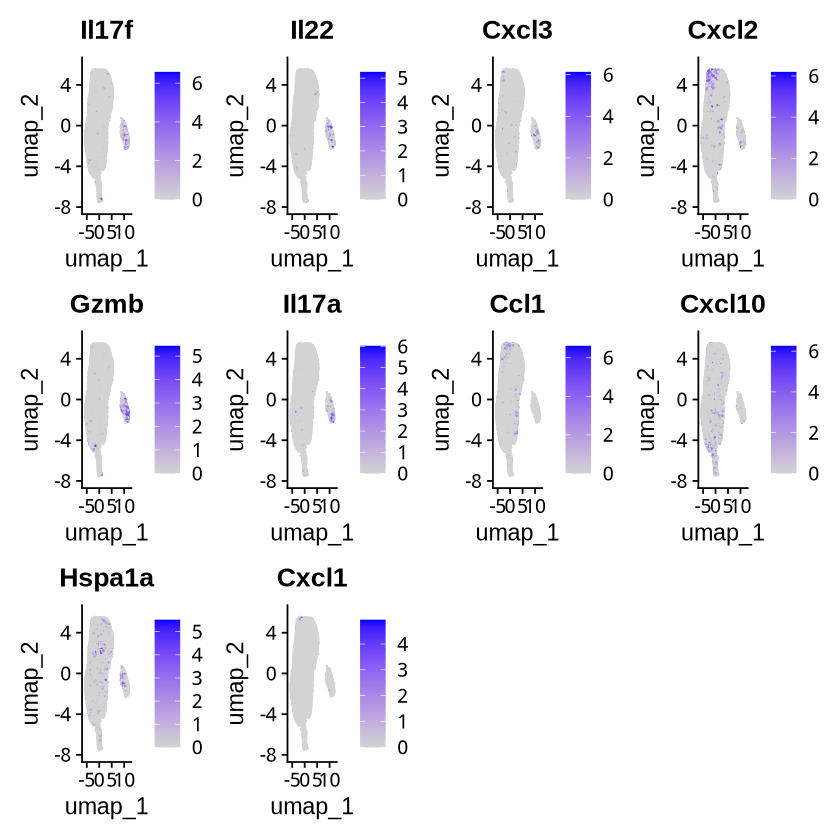

In [8]:
# 抽出した変動遺伝子をFeaturePlotで表示
FeaturePlot(GSE149622_RNA, features = top10)

In [10]:
install.packages('devtools')

 パッケージを ‘/rshare1/ZETTAI_path_WA_slash_home_KARA/home/harita/R_4.1.3_library’ 中にインストールします 
 (‘lib’ が指定されていないため) 



In [11]:
devtools::install_github('immunogenomics/presto')

data.table (1.15.4 -> 1.16.2) [CRAN]


Installing 1 packages: data.table

 パッケージを ‘/rshare1/ZETTAI_path_WA_slash_home_KARA/home/harita/R_4.1.3_library’ 中にインストールします 
 (‘lib’ が指定されていないため) 



── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/work/tmp/RtmpzybPrw/remotes8c229ed0b3f7/immunogenomics-presto-7636b3d/DESCRIPTION’ (447ms)
─  preparing ‘presto’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘presto_1.0.0.tar.gz’
   


 パッケージを ‘/rshare1/ZETTAI_path_WA_slash_home_KARA/home/harita/R_4.1.3_library’ 中にインストールします 
 (‘lib’ が指定されていないため) 



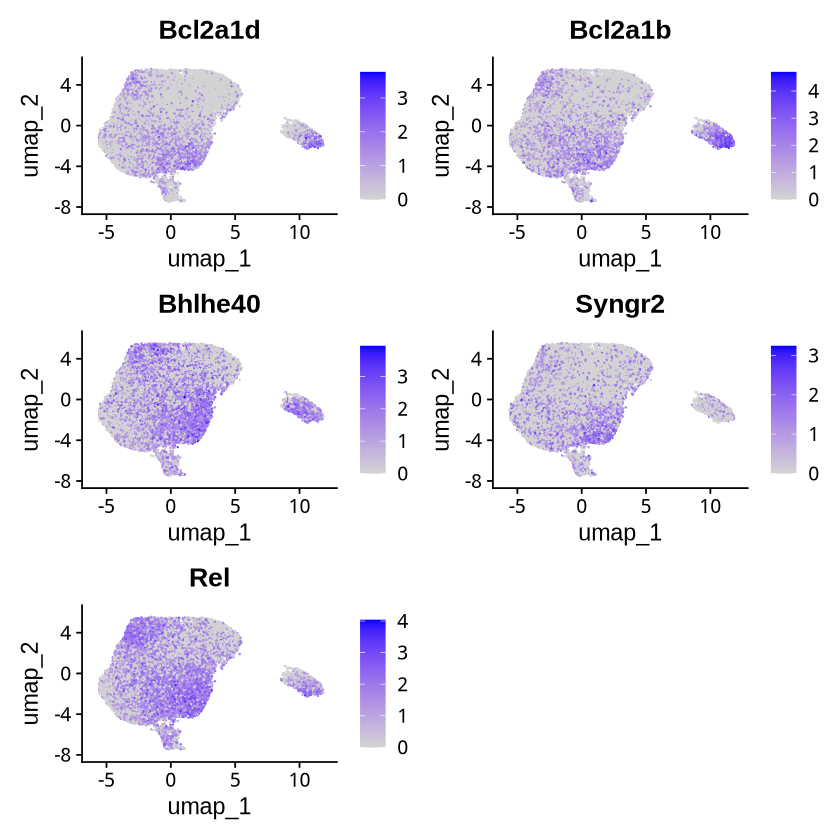

In [12]:
# cluster2のマーカー遺伝子を取得
cluster2.markers <- FindMarkers(GSE149622_RNA, ident.1 = 2)

# 最も発現が高い遺伝子を5つ取得
top5_cluster2 <- head(rownames(cluster2.markers), 5)

# それらの遺伝子をFeaturePlotで表示
FeaturePlot(GSE149622_RNA, features = top5_cluster2)

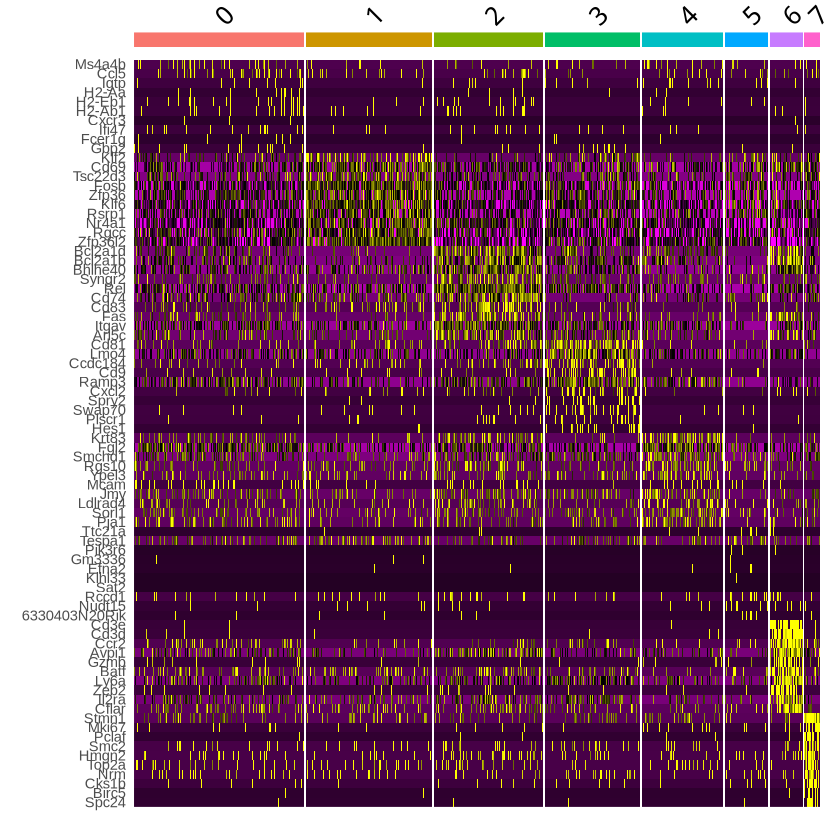

In [17]:
GSE149622_RNA.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10
DoHeatmap(GSE149622_RNA, features = top10$gene) + NoLegend()

In [9]:
str(GSE149622_RNA)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:40595977] 24 38 42 62 70 76 80 90 93 104 ...
  .. .. .. .. .. .. ..@ p       : int [1:26070] 0 1162 3416 4784 6623 8285 9526 11286 12564 14520 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 16842 26069
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:40595977] 1 10 1 3 4 1 1 6 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:40595977] 24 38 42 62 70 76 80 90 93 104 ...
  .. .. .. .. .. .. ..@ p       : int [1:26070] 0 1162 3416 4784 6623 8

In [18]:
# ファイル名を指定（例: GSE149622_RNA_markers.txt）
OFILE <- "GSE149622_RNA_markers.txt"

# データをタブ区切り形式で保存
write.table(GSE149622_RNA.markers, file = OFILE, col.names = TRUE, row.names = FALSE, append = FALSE, quote = FALSE, sep = "\t")

In [8]:
# p.adjustが5%未満のデータをフィルタリング
significant_markers <- GSE149622_RNA.markers %>%
    dplyr::filter(p_val_adj < 0.05)

# フィルタリングしたデータをタブ区切り形式で保存
OFILE <- "GSE149622_RNA_markers_significant.txt"
write.table(significant_markers, file = OFILE, col.names = TRUE, row.names = FALSE, append = FALSE, quote = FALSE, sep = "\t")

In [20]:
# gene列だけを抽出
gene_list <- GSE149622_RNA.markers %>%
    dplyr::select(gene)

# gene_listの内容を確認
print(gene_list)

# タブ区切り形式で保存（必要に応じて）
write.table(gene_list, file = "gene_list.txt", sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE)

                          gene
Lgals1                  Lgals1
Actg1                    Actg1
S100a4                  S100a4
S100a6                  S100a6
S100a11                S100a11
Vim                        Vim
Actb                      Actb
Crip1                    Crip1
Anxa2                    Anxa2
Lmna                      Lmna
Neurl3                  Neurl3
Rgs1                      Rgs1
S100a10                S100a10
Icos                      Icos
Cotl1                    Cotl1
Ifngr1                  Ifngr1
Myl6                      Myl6
Calm1                    Calm1
Fgl2                      Fgl2
Glrx                      Glrx
Ms4a4b                  Ms4a4b
Sub1                      Sub1
Itm2b                    Itm2b
Nkg7                      Nkg7
Lmnb1                    Lmnb1
Txn1                      Txn1
Ubald2                  Ubald2
H2-K1                    H2-K1
Vps37b                  Vps37b
Gapdh                    Gapdh
Tmsb4x                  Tmsb4x
Sh3bgrl3

In [17]:
# クラスターごとにgeneを抽出し、タブ区切り形式で保存
clusters <- unique(significant_markers$cluster)

# 各クラスターに対してgeneを抽出し、保存
for (cluster_id in clusters) {
    # クラスターごとにgeneを抽出
    gene_list <- significant_markers %>%
        dplyr::filter(cluster == cluster_id) %>%
        dplyr::select(gene)
    
    # ファイル名をクラスターIDに基づいて作成
    file_name <- paste0("gene_list_cluster_", cluster_id, ".txt")
    
    # geneリストをタブ区切り形式で保存
    write.table(gene_list, file = file_name, sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE)
    
    # 保存した内容を確認
    print(paste("Cluster", cluster_id, "gene list saved as", file_name))
}

[1] "Cluster 0 gene list saved as gene_list_cluster_0.txt"
[1] "Cluster 1 gene list saved as gene_list_cluster_1.txt"
[1] "Cluster 2 gene list saved as gene_list_cluster_2.txt"
[1] "Cluster 3 gene list saved as gene_list_cluster_3.txt"
[1] "Cluster 4 gene list saved as gene_list_cluster_4.txt"
[1] "Cluster 5 gene list saved as gene_list_cluster_5.txt"
[1] "Cluster 6 gene list saved as gene_list_cluster_6.txt"
[1] "Cluster 7 gene list saved as gene_list_cluster_7.txt"


In [11]:
clusters <- unique(significant_markers$cluster)

In [12]:
gene_list <- significant_markers %>%
    dplyr::filter(cluster == cluster_id) %>%
    dplyr::select(gene)

In [13]:
file_name <- paste0("gene_list_cluster_", cluster_id, ".txt")
write.table(gene_list, file = file_name, sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE)

In [14]:
print(paste("Cluster", cluster_id, "gene list saved as", file_name))

[1] "Cluster 7 gene list saved as gene_list_cluster_7.txt"


In [15]:
for (cluster_id in clusters) {
    file_name <- paste0("gene_list_cluster_", cluster_id, ".txt")
    print(read.table(file_name, sep = "\t", header = TRUE))
}

              gene
1           Lgals1
2            Actg1
3           S100a4
4           S100a6
5          S100a11
6              Vim
7             Actb
8            Crip1
9            Anxa2
10            Lmna
11          Neurl3
12            Rgs1
13         S100a10
14            Icos
15           Cotl1
16          Ifngr1
17            Myl6
18           Calm1
19            Fgl2
20            Glrx
21          Ms4a4b
22            Sub1
23           Itm2b
24            Nkg7
25           Lmnb1
26            Txn1
27          Ubald2
28           H2-K1
29          Vps37b
30           Gapdh
31          Tmsb4x
32        Sh3bgrl3
33            Rgs2
34           Nr3c1
35            Cfl1
36            Ccl5
37           Ywhaq
38             Cd7
39          Dnajb6
40          Coro1a
41            Pfn1
42           Grap2
43           H2-D1
44           Anxa6
45         Arhgdib
46           Cdc42
47           Ostf1
48           Cytip
49            Tpm4
50        Tnfrsf1b
51           Klrk1
52          